In [1]:
import argparse
import logging
import os
import sys

import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt

import torch
import torch.nn as nn
from torch import optim
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import DataLoader, random_split

sys.path.append("..")
sys.path.append("../scripts/")
import superlayer.utils

from scripts import eval_net, train_net, get_args

from superlayer.models import SUnet
from superlayer.utils import BrainD, dice_coeff, one_hot, plot_img_array, plot_side_by_side

In [2]:
net1_W = np.load("/home/vib9/src/SL-Net/superlayer/models/superblocks/SLN_64.npy")
net5_W = np.load("/home/vib9/src/SL-Net/superlayer/models/superblocks/AE_64.npy")[:32,:,:,:]
net6_W = np.load("/home/vib9/src/SL-Net/superlayer/models/superblocks/AE_128.npy")[:64,:,:,:]
net7_W = np.load("/home/vib9/src/SL-Net/superlayer/models/superblocks/AE_200.npy")[:100,:,:,:]
net8_W = np.load("/home/vib9/src/SL-Net/superlayer/models/superblocks/AE_256.npy")[:128,:,:,:]

In [3]:
dir_img = '/home/gid-dalcaav/projects/neuron/data/t1_mix/proc/resize256-crop_x32-slice100/train/vols/'
dir_mask = '/home/gid-dalcaav/projects/neuron/data/t1_mix/proc/resize256-crop_x32-slice100/train/asegs/'

dir_train = '/home/vib9/src/SL-Net/jupyter/partitions/train.txt'
dir_val = '/home/vib9/src/SL-Net/jupyter/partitions/val.txt'

dir_checkpoint_1 = 'checkpoints_1/'
dir_checkpoint_2 = 'checkpoints_2/'

In [4]:
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')
args = get_args()
device = torch.device('cuda')
logging.info(f'Using device {device}')

INFO: Using device cuda


In [5]:
target_label_numbers = [0,2,3,4,10,16,17,28,31,41,42,43,49,53,63]
val_percent = 0.1
batch_size = args.batchsize
lr = args.lr
img_scale = args.scale
writer = SummaryWriter(comment=f'LR_{lr}_BS_{batch_size}_SCALE_{img_scale}')

In [6]:
enc_nf = [32, 32, 32, 32]
dec_nf = [32, 32, 32, 32]
net5 = SUnet(input_ch=1, out_ch=15, use_bn=True, enc_nf=enc_nf, dec_nf=dec_nf, ignore_last=False, W=net5_W)

logging.info(f'Network:\n'
             f'\t{1} input channels\n'
             f'\t{15} output channels (classes)\n')

net5.to(device=device)
train_scores5, val_scores5, train_var_5, val_var_5 = train_net(net=net5,
                                                                epochs=8,
                                                                batch_size=args.batchsize,
                                                                lr=args.lr,
                                                                device=device,
                                                                img_scale=args.scale,
                                                                val_percent=args.val / 100,
                                                                checkpoint=2,
                                                                target_label_numbers=target_label_numbers,
                                                                writer=writer,
                                                                train_path=dir_train,
                                                                val_path=dir_val)

(32, 64, 3, 3)


INFO: Network:
	1 input channels
	15 output channels (classes)

INFO: Creating dataset with 7329 examples
INFO: Creating dataset with 7329 examples
INFO: Starting training:
        Epochs:          8
        Batch size:      8
        Learning rate:   0.001
        Training size:   7329
        Validation size: 7329
        Checkpoints:     True
        Device:          cuda
        Images scaling:  1
    
Validation round:  99%|█████████▉| 910/916 [00:40<00:00, 24.45batch/s]
                                                                      INFO: Validation Dice Loss: 0.21262427121726185
Validation round:  36%|███▌      | 330/916 [00:13<00:24, 23.71batch/s]


Validation round:  99%|█████████▉| 911/916 [00:37<00:00, 24.12batch/s]
                                                                      INFO: Validation Dice Loss: 0.1939414761570083
Validation round:   1%|          | 11/916 [00:01<06:49,  2.21batch/s]


Validation round: 100%|█████████▉| 915/916 [00:39<00:00, 24.55batch/s]
                                                                      INFO: Validation Dice Loss: 0.194163719021337
Validation round:  64%|██████▍   | 588/916 [00:25<00:13, 24.10batch/s]


Validation round: 100%|██████████| 916/916 [00:38<00:00, 23.77batch/s]
                                                                      INFO: Validation Dice Loss: 0.18750238812256068
Validation round: 100%|█████████▉| 914/916 [00:37<00:00, 27.28batch/s]
                                                                      INFO: Validation Dice Loss: 0.18518747316112164
Epoch 1/8: 100%|██████████| 7329/7329 [03:50<00:00, 31.75img/s, loss (batch)=0.341] 
INFO: Checkpoint 1 saved !
Validation round:   0%|          | 1/916 [00:00<09:47,  1.56batch/s]


Validation round: 100%|█████████▉| 913/916 [00:38<00:00, 24.04batch/s]
                                                                      INFO: Validation Dice Loss: 0.17995128084348277
Validation round:  81%|████████▏ | 745/916 [00:31<00:07, 23.81batch/s]


Validation round: 100%|█████████▉| 913/916 [00:39<00:00, 23.83batch/s]
                                                                      INFO: Validation Dice Loss: 0.19129675374606292
Validation round:  99%|█████████▉| 910/916 [00:37<00:00, 21.71batch/s]
                                                                      INFO: Validation Dice Loss: 0.17518621483028715
Validation round:  27%|██▋       | 249/916 [00:10<00:26, 25.60batch/s]


Validation round: 100%|██████████| 916/916 [00:38<00:00, 25.74batch/s]
                                                                      INFO: Validation Dice Loss: 0.17367772530260045
Validation round:  61%|██████▏   | 562/916 [00:23<00:16, 21.87batch/s]


Validation round: 100%|█████████▉| 915/916 [00:38<00:00, 23.26batch/s]
                                                                      INFO: Validation Dice Loss: 0.1767144201721947
Epoch 2/8: 100%|██████████| 7329/7329 [03:50<00:00, 31.80img/s, loss (batch)=0.329] 
INFO: Checkpoint 2 saved !
Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 25.56batch/s]
                                                                      INFO: Validation Dice Loss: 0.17400326988127035


Validation round:  99%|█████████▉| 910/916 [00:37<00:00, 25.50batch/s]
                                                                      INFO: Validation Dice Loss: 0.16881464429882936
Validation round:  59%|█████▉    | 539/916 [00:22<00:16, 23.28batch/s]


Validation round: 100%|█████████▉| 915/916 [00:38<00:00, 26.40batch/s]
                                                                      INFO: Validation Dice Loss: 0.16842514328560976
Validation round: 100%|██████████| 916/916 [00:38<00:00, 23.80batch/s]
                                                                      INFO: Validation Dice Loss: 0.16825465898651742
Validation round:   9%|▉         | 84/916 [00:03<00:36, 22.66batch/s]


Validation round: 100%|█████████▉| 912/916 [00:38<00:00, 27.15batch/s]
                                                                      INFO: Validation Dice Loss: 0.1644328046899175
Epoch 3/8: 100%|██████████| 7329/7329 [03:48<00:00, 32.05img/s, loss (batch)=0.277] 
INFO: Checkpoint 3 saved !
Validation round:  81%|████████  | 741/916 [00:30<00:06, 25.22batch/s]


Validation round: 100%|█████████▉| 912/916 [00:37<00:00, 25.36batch/s]
                                                                      INFO: Validation Dice Loss: 0.16523570518566533
Validation round: 100%|█████████▉| 912/916 [00:37<00:00, 24.82batch/s]
                                                                      INFO: Validation Dice Loss: 0.16865572090947992
Validation round:   9%|▉         | 82/916 [00:04<00:43, 19.07batch/s]


Validation round:  99%|█████████▉| 911/916 [00:39<00:00, 24.73batch/s]
                                                                      INFO: Validation Dice Loss: 0.1651538917916831
Validation round:  85%|████████▍ | 776/916 [00:32<00:06, 22.94batch/s]


Validation round: 100%|█████████▉| 912/916 [00:38<00:00, 26.05batch/s]
                                                                      INFO: Validation Dice Loss: 0.16010216127381574
Validation round: 100%|█████████▉| 913/916 [00:39<00:00, 24.38batch/s]
                                                                      INFO: Validation Dice Loss: 0.16077926969684367
Epoch 4/8: 100%|██████████| 7329/7329 [03:51<00:00, 31.63img/s, loss (batch)=0.245] 
INFO: Checkpoint 4 saved !
Validation round:  62%|██████▏   | 569/916 [00:25<00:14, 23.22batch/s]


Validation round: 100%|█████████▉| 913/916 [00:40<00:00, 24.43batch/s]
                                                                      INFO: Validation Dice Loss: 0.16007122909853552
Validation round:  99%|█████████▉| 909/916 [00:38<00:00, 26.57batch/s]
                                                                      INFO: Validation Dice Loss: 0.16091092422149067
Validation round:   0%|          | 1/916 [00:00<13:02,  1.17batch/s]


Validation round: 100%|█████████▉| 912/916 [00:37<00:00, 21.44batch/s]
                                                                      INFO: Validation Dice Loss: 0.16067098414598593
Validation round:  35%|███▌      | 324/916 [00:14<00:23, 25.44batch/s]


Validation round: 100%|█████████▉| 915/916 [00:37<00:00, 24.10batch/s]
                                                                      INFO: Validation Dice Loss: 0.15973486983945276
Validation round:  80%|████████  | 735/916 [00:30<00:08, 22.36batch/s]


Validation round: 100%|█████████▉| 915/916 [00:37<00:00, 26.45batch/s]
                                                                      INFO: Validation Dice Loss: 0.15980334012203862
Epoch 5/8: 100%|██████████| 7329/7329 [03:50<00:00, 31.82img/s, loss (batch)=0.271] 
INFO: Checkpoint 5 saved !
Validation round:  99%|█████████▉| 910/916 [00:39<00:00, 24.21batch/s]
                                                                      INFO: Validation Dice Loss: 0.1591088839493464
Validation round:  27%|██▋       | 248/916 [00:11<00:33, 20.24batch/s]


Validation round:  99%|█████████▉| 910/916 [00:39<00:00, 23.44batch/s]
                                                                      INFO: Validation Dice Loss: 0.15853981535442532
Validation round:  78%|███████▊  | 716/916 [00:29<00:07, 26.70batch/s]


Validation round:  99%|█████████▉| 910/916 [00:38<00:00, 23.42batch/s]
                                                                      INFO: Validation Dice Loss: 0.15940126461102974
Validation round:  99%|█████████▉| 911/916 [00:38<00:00, 26.23batch/s]
                                                                      INFO: Validation Dice Loss: 0.16084012965057615
Validation round:  21%|██        | 193/916 [00:08<00:30, 23.38batch/s]


Validation round: 100%|█████████▉| 912/916 [00:38<00:00, 24.12batch/s]
                                                                      INFO: Validation Dice Loss: 0.15932253434212967
Epoch 6/8: 100%|██████████| 7329/7329 [03:52<00:00, 31.50img/s, loss (batch)=0.373] 
INFO: Checkpoint 6 saved !
Validation round:  69%|██████▉   | 634/916 [00:26<00:11, 25.23batch/s]


Validation round: 100%|█████████▉| 914/916 [00:38<00:00, 25.33batch/s]
                                                                      INFO: Validation Dice Loss: 0.1588906437874361
Validation round: 100%|█████████▉| 913/916 [00:39<00:00, 23.55batch/s]
                                                                      INFO: Validation Dice Loss: 0.15878626930336245
Validation round:  20%|██        | 186/916 [00:07<00:28, 25.53batch/s]


Validation round: 100%|█████████▉| 914/916 [00:37<00:00, 25.30batch/s]
                                                                      INFO: Validation Dice Loss: 0.1586677072708003
Validation round:  41%|████      | 372/916 [00:15<00:21, 25.71batch/s]


Validation round: 100%|█████████▉| 915/916 [00:37<00:00, 26.24batch/s]
                                                                      INFO: Validation Dice Loss: 0.1586436006732643
Validation round:  85%|████████▍ | 775/916 [00:32<00:05, 24.32batch/s]


Validation round:  99%|█████████▉| 910/916 [00:38<00:00, 22.11batch/s]
                                                                      INFO: Validation Dice Loss: 0.15862539059210032
Epoch 7/8: 100%|██████████| 7329/7329 [03:50<00:00, 31.85img/s, loss (batch)=0.269] 
INFO: Checkpoint 7 saved !
Validation round: 100%|█████████▉| 913/916 [00:37<00:00, 25.32batch/s]
                                                                      INFO: Validation Dice Loss: 0.15868291626460687
Validation round:  22%|██▏       | 198/916 [00:08<00:30, 23.26batch/s]


Validation round:  99%|█████████▉| 910/916 [00:39<00:00, 23.19batch/s]
                                                                      INFO: Validation Dice Loss: 0.15866847443658713
Validation round: 100%|█████████▉| 913/916 [00:38<00:00, 26.71batch/s]
                                                                      INFO: Validation Dice Loss: 0.1586683063918326
Validation round:   2%|▏         | 19/916 [00:01<04:08,  3.61batch/s]


Validation round:  99%|█████████▉| 910/916 [00:37<00:00, 24.58batch/s]
                                                                      INFO: Validation Dice Loss: 0.15868359067229204
Validation round:  37%|███▋      | 342/916 [00:14<00:23, 24.80batch/s]


Validation round:  99%|█████████▉| 911/916 [00:37<00:00, 24.90batch/s]
                                                                      INFO: Validation Dice Loss: 0.15868400439099453


Epoch 8/8: 100%|██████████| 7329/7329 [03:47<00:00, 32.14img/s, loss (batch)=0.314] 
INFO: Checkpoint 8 saved !


In [7]:
enc_nf = [64, 64, 64, 64]
dec_nf = [64, 64, 64, 64]
net6 = SUnet(input_ch=1, out_ch=15, use_bn=True, enc_nf=enc_nf, dec_nf=dec_nf, ignore_last=False, W=net6_W)

logging.info(f'Network:\n'
             f'\t{1} input channels\n'
             f'\t{15} output channels (classes)\n')

net6.to(device=device)
train_scores6, val_scores6, train_var_6, val_var_6 = train_net(net=net6,
                                                                epochs=8,
                                                                batch_size=args.batchsize,
                                                                lr=args.lr,
                                                                device=device,
                                                                img_scale=args.scale,
                                                                val_percent=args.val / 100,
                                                                checkpoint=2,
                                                                target_label_numbers=target_label_numbers,
                                                                writer=writer,
                                                                train_path=dir_train,
                                                                val_path=dir_val)

INFO: Network:
	1 input channels
	15 output channels (classes)

INFO: Creating dataset with 7329 examples
INFO: Creating dataset with 7329 examples
INFO: Starting training:
        Epochs:          8
        Batch size:      8
        Learning rate:   0.001
        Training size:   7329
        Validation size: 7329
        Checkpoints:     True
        Device:          cuda
        Images scaling:  1
    
Epoch 1/8:   0%|          | 0/7329 [00:00<?, ?img/s]

(64, 128, 3, 3)


Validation round: 100%|█████████▉| 912/916 [00:39<00:00, 23.31batch/s]
                                                                      INFO: Validation Dice Loss: 0.16802802245950074
Validation round:  71%|███████   | 649/916 [00:28<00:12, 21.70batch/s]


Validation round: 100%|█████████▉| 913/916 [00:39<00:00, 24.01batch/s]
                                                                      INFO: Validation Dice Loss: 0.14974881542692017
Validation round: 100%|█████████▉| 913/916 [00:39<00:00, 23.13batch/s]
                                                                      INFO: Validation Dice Loss: 0.14427330855719386
Epoch 1/8:  80%|███████▉  | 5856/7329 [02:40<00:07, 201.69img/s, loss (batch)=0.284]


Validation round: 100%|█████████▉| 912/916 [00:39<00:00, 22.66batch/s]
                                                                      INFO: Validation Dice Loss: 0.1189600172163878
Validation round:  66%|██████▋   | 609/916 [00:25<00:14, 21.72batch/s]


Validation round: 100%|█████████▉| 914/916 [00:37<00:00, 22.59batch/s]
                                                                      INFO: Validation Dice Loss: 0.1168589623783223
Epoch 1/8: 100%|██████████| 7329/7329 [03:54<00:00, 31.25img/s, loss (batch)=0.285] 
INFO: Checkpoint 1 saved !
Validation round:  99%|█████████▊| 903/916 [00:37<00:00, 26.99batch/s]


Validation round: 100%|█████████▉| 913/916 [00:37<00:00, 22.14batch/s]
                                                                      INFO: Validation Dice Loss: 0.11941027764117093
Validation round: 100%|█████████▉| 913/916 [00:41<00:00, 22.83batch/s]
                                                                      INFO: Validation Dice Loss: 0.1144847719397347
Validation round:  66%|██████▌   | 605/916 [00:26<00:13, 23.74batch/s]


Validation round:  99%|█████████▉| 909/916 [00:39<00:00, 21.85batch/s]
                                                                      INFO: Validation Dice Loss: 0.11164914634420361
Validation round: 100%|█████████▉| 913/916 [00:38<00:00, 21.67batch/s]
                                                                      INFO: Validation Dice Loss: 0.1112654040197488
Validation round:  11%|█         | 98/916 [00:04<00:44, 18.30batch/s]


Validation round: 100%|█████████▉| 913/916 [00:37<00:00, 25.06batch/s]
                                                                      INFO: Validation Dice Loss: 0.11387842885466642
Epoch 2/8: 100%|██████████| 7329/7329 [03:54<00:00, 31.30img/s, loss (batch)=0.241] 
INFO: Checkpoint 2 saved !
Validation round:  55%|█████▍    | 502/916 [00:22<00:17, 23.11batch/s]


Validation round:  99%|█████████▉| 910/916 [00:39<00:00, 23.80batch/s]
                                                                      INFO: Validation Dice Loss: 0.1076834004160879
Validation round: 100%|█████████▉| 915/916 [00:38<00:00, 26.97batch/s]
                                                                      INFO: Validation Dice Loss: 0.10543077107209826
Validation round:   4%|▍         | 37/916 [00:02<00:58, 15.15batch/s]


Validation round: 100%|█████████▉| 914/916 [00:39<00:00, 22.12batch/s]
                                                                      INFO: Validation Dice Loss: 0.10341980397766334
Validation round:  51%|█████     | 468/916 [00:19<00:18, 23.63batch/s]


Validation round: 100%|█████████▉| 914/916 [00:38<00:00, 25.60batch/s]
                                                                      INFO: Validation Dice Loss: 0.10573614126795244
Validation round: 100%|█████████▉| 912/916 [00:39<00:00, 24.36batch/s]
                                                                      INFO: Validation Dice Loss: 0.10474308785132445
Epoch 3/8: 100%|██████████| 7329/7329 [03:54<00:00, 31.22img/s, loss (batch)=0.263] 
INFO: Checkpoint 3 saved !


Validation round: 100%|█████████▉| 912/916 [00:39<00:00, 23.28batch/s]
                                                                      INFO: Validation Dice Loss: 0.10234622174150038
Validation round:  47%|████▋     | 435/916 [00:19<00:21, 22.77batch/s]


Validation round: 100%|█████████▉| 915/916 [00:39<00:00, 23.12batch/s]
                                                                      INFO: Validation Dice Loss: 0.10471266209591164
Validation round:  87%|████████▋ | 793/916 [00:32<00:04, 25.78batch/s]


Validation round: 100%|█████████▉| 914/916 [00:37<00:00, 24.48batch/s]
                                                                      INFO: Validation Dice Loss: 0.10175285036939981
Validation round:  99%|█████████▉| 911/916 [00:38<00:00, 23.58batch/s]
                                                                      INFO: Validation Dice Loss: 0.10196177194537555
Validation round:  17%|█▋        | 156/916 [00:07<00:37, 20.40batch/s]


Validation round: 100%|██████████| 916/916 [00:39<00:00, 25.21batch/s]
                                                                      INFO: Validation Dice Loss: 0.10198821967638476
Epoch 4/8: 100%|██████████| 7329/7329 [03:54<00:00, 31.32img/s, loss (batch)=0.202]
INFO: Checkpoint 4 saved !
Validation round:  73%|███████▎  | 669/916 [00:27<00:09, 25.69batch/s]


Validation round: 100%|██████████| 916/916 [00:38<00:00, 26.66batch/s]
                                                                      INFO: Validation Dice Loss: 0.1003599201032168
Validation round: 100%|█████████▉| 912/916 [00:39<00:00, 23.35batch/s]
                                                                      INFO: Validation Dice Loss: 0.10180503216990998
Validation round:  12%|█▏        | 109/916 [00:05<00:39, 20.66batch/s]


Validation round: 100%|█████████▉| 914/916 [00:39<00:00, 23.17batch/s]
                                                                      INFO: Validation Dice Loss: 0.10301619777089904
Validation round:  55%|█████▌    | 504/916 [00:21<00:13, 29.78batch/s]


Validation round:  99%|█████████▉| 909/916 [00:37<00:00, 24.55batch/s]
                                                                      INFO: Validation Dice Loss: 0.1003568232645114
Validation round: 100%|█████████▉| 915/916 [00:39<00:00, 23.43batch/s]
                                                                      INFO: Validation Dice Loss: 0.0960467286066327
Epoch 5/8: 100%|██████████| 7329/7329 [03:54<00:00, 31.20img/s, loss (batch)=0.264] 
INFO: Checkpoint 5 saved !
Epoch 6/8:  19%|█▉        | 1376/7329 [00:08<00:31, 189.77img/s, loss (batch)=0.267]


Validation round:  99%|█████████▉| 909/916 [00:39<00:00, 23.64batch/s]
                                                                      INFO: Validation Dice Loss: 0.09714570637450728
Validation round:  47%|████▋     | 428/916 [00:18<00:20, 23.41batch/s]


Validation round: 100%|██████████| 916/916 [00:38<00:00, 25.37batch/s]
                                                                      INFO: Validation Dice Loss: 0.09625418487464496
Validation round: 100%|█████████▉| 912/916 [00:40<00:00, 23.54batch/s]
                                                                      INFO: Validation Dice Loss: 0.096567030914746
Validation round:   6%|▌         | 57/916 [00:02<00:41, 20.54batch/s]


Validation round:  99%|█████████▉| 909/916 [00:38<00:00, 24.43batch/s]
                                                                      INFO: Validation Dice Loss: 0.09584498521770192
Validation round:  69%|██████▊   | 628/916 [00:26<00:14, 19.98batch/s]


Validation round: 100%|██████████| 916/916 [00:38<00:00, 27.60batch/s]
                                                                      INFO: Validation Dice Loss: 0.09595116724028338
Epoch 6/8: 100%|██████████| 7329/7329 [03:54<00:00, 31.20img/s, loss (batch)=0.202] 
INFO: Checkpoint 6 saved !
Validation round:  99%|█████████▉| 909/916 [00:39<00:00, 23.19batch/s]
                                                                      INFO: Validation Dice Loss: 0.09587355534745357
Validation round:  28%|██▊       | 256/916 [00:11<00:27, 23.60batch/s]


Validation round: 100%|█████████▉| 912/916 [00:39<00:00, 23.38batch/s]
                                                                      INFO: Validation Dice Loss: 0.09578398803826503
Validation round:  98%|█████████▊| 896/916 [00:38<00:00, 21.75batch/s]


Validation round:  99%|█████████▉| 909/916 [00:39<00:00, 20.69batch/s]
                                                                      INFO: Validation Dice Loss: 0.09600851030036091
Validation round: 100%|█████████▉| 914/916 [00:37<00:00, 27.58batch/s]
                                                                      INFO: Validation Dice Loss: 0.09585644567474788
Validation round:  41%|████▏     | 380/916 [00:16<00:23, 23.05batch/s]


Validation round: 100%|██████████| 916/916 [00:39<00:00, 23.69batch/s]
                                                                      INFO: Validation Dice Loss: 0.09598976230517225
Epoch 7/8: 100%|██████████| 7329/7329 [03:55<00:00, 31.07img/s, loss (batch)=0.224] 
INFO: Checkpoint 7 saved !
Validation round:  99%|█████████▉| 910/916 [00:39<00:00, 23.61batch/s]
                                                                      INFO: Validation Dice Loss: 0.09597512032820409
Validation round:   5%|▌         | 49/916 [00:02<00:50, 17.09batch/s]


Validation round:  99%|█████████▉| 911/916 [00:38<00:00, 20.73batch/s]
                                                                      INFO: Validation Dice Loss: 0.09593244175137912
Validation round:  50%|█████     | 458/916 [00:18<00:18, 24.57batch/s]


Validation round:  99%|█████████▉| 911/916 [00:37<00:00, 22.10batch/s]
                                                                      INFO: Validation Dice Loss: 0.09589743322192582
Validation round:  99%|█████████▉| 911/916 [00:39<00:00, 23.71batch/s]
                                                                      INFO: Validation Dice Loss: 0.09589084476948305
Validation round:   6%|▌         | 53/916 [00:02<00:45, 18.77batch/s]


Validation round: 100%|██████████| 916/916 [00:37<00:00, 24.27batch/s]
                                                                      INFO: Validation Dice Loss: 0.09588901829543853
Epoch 8/8: 100%|██████████| 7329/7329 [03:51<00:00, 31.60img/s, loss (batch)=0.218] 
INFO: Checkpoint 8 saved !


In [8]:
enc_nf = [100, 100, 100, 100]
dec_nf = [100, 100, 100, 100]
net7 = SUnet(input_ch=1, out_ch=15, use_bn=True, enc_nf=enc_nf, dec_nf=dec_nf, ignore_last=False, W=net7_W)

logging.info(f'Network:\n'
             f'\t{1} input channels\n'
             f'\t{15} output channels (classes)\n')

net7.to(device=device)
train_scores7, val_scores7, train_var_7, val_var_7 = train_net(net=net7,
                                                                epochs=8,
                                                                batch_size=args.batchsize,
                                                                lr=args.lr,
                                                                device=device,
                                                                img_scale=args.scale,
                                                                val_percent=args.val / 100,
                                                                checkpoint=2,
                                                                target_label_numbers=target_label_numbers,
                                                                writer=writer,
                                                                train_path=dir_train,
                                                                val_path=dir_val)

INFO: Network:
	1 input channels
	15 output channels (classes)

INFO: Creating dataset with 7329 examples
INFO: Creating dataset with 7329 examples
INFO: Starting training:
        Epochs:          8
        Batch size:      8
        Learning rate:   0.001
        Training size:   7329
        Validation size: 7329
        Checkpoints:     True
        Device:          cuda
        Images scaling:  1
    
Epoch 1/8:   0%|          | 0/7329 [00:00<?, ?img/s]

(100, 200, 3, 3)


Validation round: 100%|█████████▉| 912/916 [00:38<00:00, 23.03batch/s]
                                                                      INFO: Validation Dice Loss: 0.27904587653851926
Epoch 1/8:  40%|███▉      | 2928/7329 [00:59<00:30, 146.38img/s, loss (batch)=0.465] 


Validation round: 100%|██████████| 916/916 [00:40<00:00, 20.61batch/s]
                                                                      INFO: Validation Dice Loss: 0.2641533988011456
Validation round:   3%|▎         | 32/916 [00:01<01:07, 13.03batch/s]


Validation round: 100%|█████████▉| 915/916 [00:39<00:00, 21.59batch/s]
                                                                      INFO: Validation Dice Loss: 0.2978032993957986
Validation round:   6%|▌         | 54/916 [00:02<00:41, 20.87batch/s]


Validation round: 100%|█████████▉| 914/916 [00:40<00:00, 19.56batch/s]
                                                                      INFO: Validation Dice Loss: 0.25438047883682374
Validation round:  10%|█         | 92/916 [00:04<00:38, 21.41batch/s]


Validation round: 100%|█████████▉| 915/916 [00:39<00:00, 20.98batch/s]
                                                                      INFO: Validation Dice Loss: 0.24467164429319477
Epoch 1/8: 100%|██████████| 7329/7329 [04:09<00:00, 29.33img/s, loss (batch)=0.443] 
INFO: Checkpoint 1 saved !
Validation round:  13%|█▎        | 116/916 [00:05<00:31, 25.64batch/s]


Validation round: 100%|█████████▉| 914/916 [00:39<00:00, 22.98batch/s]
                                                                      INFO: Validation Dice Loss: 0.19541115494339226
Validation round:  17%|█▋        | 158/916 [00:07<00:35, 21.31batch/s]


Validation round: 100%|█████████▉| 914/916 [00:39<00:00, 24.89batch/s]
                                                                      INFO: Validation Dice Loss: 0.2307756662889339
Validation round:  22%|██▏       | 202/916 [00:09<00:34, 20.45batch/s]


Validation round: 100%|█████████▉| 914/916 [00:39<00:00, 21.51batch/s]
                                                                      INFO: Validation Dice Loss: 0.22768619264512605
Validation round:  27%|██▋       | 249/916 [00:11<00:32, 20.23batch/s]


Validation round: 100%|█████████▉| 913/916 [00:40<00:00, 21.43batch/s]
                                                                      INFO: Validation Dice Loss: 0.2532610617187606
Validation round:  33%|███▎      | 299/916 [00:13<00:30, 20.33batch/s]


Validation round: 100%|█████████▉| 914/916 [00:39<00:00, 21.47batch/s]
                                                                      INFO: Validation Dice Loss: 0.21157140079804382
Epoch 2/8: 100%|██████████| 7329/7329 [04:10<00:00, 29.21img/s, loss (batch)=0.376] 
INFO: Checkpoint 2 saved !
Validation round:  36%|███▌      | 327/916 [00:14<00:28, 21.02batch/s]


Validation round: 100%|█████████▉| 915/916 [00:39<00:00, 25.41batch/s]
                                                                      INFO: Validation Dice Loss: 0.19632418297524015
Validation round:  40%|████      | 370/916 [00:16<00:26, 20.77batch/s]


Validation round: 100%|██████████| 916/916 [00:39<00:00, 21.21batch/s]
                                                                      INFO: Validation Dice Loss: 0.21243539211791676
Validation round:  44%|████▍     | 407/916 [00:18<00:24, 20.84batch/s]


Validation round: 100%|██████████| 916/916 [00:39<00:00, 24.94batch/s]
                                                                      INFO: Validation Dice Loss: 0.20172705929156995
Validation round:  45%|████▌     | 414/916 [00:18<00:24, 20.10batch/s]


Validation round: 100%|█████████▉| 915/916 [00:39<00:00, 25.30batch/s]
                                                                      INFO: Validation Dice Loss: 0.2002186183390659
Validation round:  50%|████▉     | 454/916 [00:19<00:19, 24.11batch/s]


Validation round: 100%|█████████▉| 915/916 [00:38<00:00, 30.19batch/s]
                                                                      INFO: Validation Dice Loss: 0.19643556407965948
Epoch 3/8: 100%|██████████| 7329/7329 [04:09<00:00, 29.39img/s, loss (batch)=0.369] 
INFO: Checkpoint 3 saved !
Validation round:  50%|█████     | 459/916 [00:20<00:21, 21.06batch/s]


Validation round: 100%|█████████▉| 915/916 [00:39<00:00, 22.00batch/s]
                                                                      INFO: Validation Dice Loss: 0.1989233185045063
Validation round:  55%|█████▍    | 503/916 [00:21<00:16, 25.37batch/s]


Validation round: 100%|█████████▉| 915/916 [00:38<00:00, 26.32batch/s]
                                                                      INFO: Validation Dice Loss: 0.19815500147282816
Validation round:  59%|█████▉    | 541/916 [00:24<00:18, 20.52batch/s]


Validation round: 100%|█████████▉| 915/916 [00:40<00:00, 26.41batch/s]
                                                                      INFO: Validation Dice Loss: 0.19915762039381343
Validation round:  62%|██████▏   | 572/916 [00:24<00:13, 25.56batch/s]


Validation round: 100%|█████████▉| 914/916 [00:37<00:00, 24.32batch/s]
                                                                      INFO: Validation Dice Loss: 0.1987968835670615
Validation round:  60%|██████    | 551/916 [00:23<00:17, 20.94batch/s]


Validation round: 100%|█████████▉| 914/916 [00:38<00:00, 25.71batch/s]
                                                                      INFO: Validation Dice Loss: 0.19890084364919164
Epoch 4/8: 100%|██████████| 7329/7329 [04:05<00:00, 29.83img/s, loss (batch)=0.35]  
INFO: Checkpoint 4 saved !
Validation round:  59%|█████▉    | 544/916 [00:23<00:17, 21.29batch/s]


Validation round: 100%|█████████▉| 914/916 [00:39<00:00, 21.46batch/s]
                                                                      INFO: Validation Dice Loss: 0.19865155372947585
Validation round:  64%|██████▍   | 590/916 [00:26<00:13, 23.66batch/s]


Validation round: 100%|█████████▉| 914/916 [00:40<00:00, 20.88batch/s]
                                                                      INFO: Validation Dice Loss: 0.1986481357349579
Validation round:  67%|██████▋   | 613/916 [00:25<00:11, 26.21batch/s]


Validation round: 100%|█████████▉| 915/916 [00:38<00:00, 24.69batch/s]
                                                                      INFO: Validation Dice Loss: 0.19866646424456455
Validation round:  72%|███████▏  | 657/916 [00:28<00:12, 20.03batch/s]


Validation round: 100%|█████████▉| 913/916 [00:39<00:00, 20.93batch/s]
                                                                      INFO: Validation Dice Loss: 0.19867094342625297
Validation round:  77%|███████▋  | 706/916 [00:30<00:08, 25.10batch/s]


Validation round: 100%|██████████| 916/916 [00:40<00:00, 20.71batch/s]
                                                                      INFO: Validation Dice Loss: 0.19865283436715342
Epoch 5/8: 100%|██████████| 7329/7329 [04:09<00:00, 29.42img/s, loss (batch)=0.407] 
INFO: Checkpoint 5 saved !
Validation round:  79%|███████▉  | 728/916 [00:31<00:09, 20.23batch/s]


Validation round: 100%|█████████▉| 915/916 [00:39<00:00, 21.89batch/s]
                                                                      INFO: Validation Dice Loss: 0.19867273734060958
Validation round:  85%|████████▌ | 782/916 [00:34<00:05, 24.83batch/s]


Validation round: 100%|█████████▉| 913/916 [00:39<00:00, 20.36batch/s]
                                                                      INFO: Validation Dice Loss: 0.19865528019104461
Validation round:  90%|█████████ | 825/916 [00:36<00:04, 20.77batch/s]


Validation round: 100%|█████████▉| 914/916 [00:39<00:00, 20.41batch/s]
                                                                      INFO: Validation Dice Loss: 0.1986612200118829
Validation round:  92%|█████████▏| 841/916 [00:34<00:03, 24.24batch/s]


Validation round: 100%|█████████▉| 912/916 [00:37<00:00, 21.07batch/s]
                                                                      INFO: Validation Dice Loss: 0.1986520455979364
Validation round:  96%|█████████▋| 883/916 [00:37<00:01, 24.27batch/s]


Validation round: 100%|█████████▉| 912/916 [00:39<00:00, 22.08batch/s]
                                                                      INFO: Validation Dice Loss: 0.19864538202965104
Epoch 6/8: 100%|██████████| 7329/7329 [04:08<00:00, 29.53img/s, loss (batch)=0.395] 
INFO: Checkpoint 6 saved !
Validation round:  99%|█████████▉| 906/916 [00:38<00:00, 22.54batch/s]


Validation round: 100%|█████████▉| 915/916 [00:39<00:00, 22.58batch/s]
                                                                      INFO: Validation Dice Loss: 0.19862020884408702
Validation round: 100%|█████████▉| 913/916 [00:39<00:00, 24.72batch/s]
                                                                      INFO: Validation Dice Loss: 0.19861511014174166
Validation round:   3%|▎         | 28/916 [00:01<01:36,  9.18batch/s]


Validation round: 100%|█████████▉| 914/916 [00:39<00:00, 19.86batch/s]
                                                                      INFO: Validation Dice Loss: 0.1985873476842085
Validation round:   7%|▋         | 61/916 [00:03<00:47, 18.00batch/s]


Validation round: 100%|█████████▉| 912/916 [00:38<00:00, 22.60batch/s]
                                                                      INFO: Validation Dice Loss: 0.19859135686114887
Validation round:  11%|█         | 100/916 [00:04<00:45, 17.78batch/s]


Validation round: 100%|█████████▉| 915/916 [00:39<00:00, 23.43batch/s]
                                                                      INFO: Validation Dice Loss: 0.19861925217652426
Epoch 7/8: 100%|██████████| 7329/7329 [04:08<00:00, 29.50img/s, loss (batch)=0.407] 
INFO: Checkpoint 7 saved !
Validation round:  12%|█▏        | 113/916 [00:05<00:32, 24.98batch/s]


Validation round: 100%|██████████| 916/916 [00:39<00:00, 22.48batch/s]
                                                                      INFO: Validation Dice Loss: 0.19865485384865098
Validation round:  17%|█▋        | 153/916 [00:07<00:33, 22.77batch/s]


Validation round: 100%|██████████| 916/916 [00:38<00:00, 23.87batch/s]
                                                                      INFO: Validation Dice Loss: 0.19863396969229374
Validation round:  11%|█         | 103/916 [00:04<00:33, 24.05batch/s]


Validation round: 100%|█████████▉| 913/916 [00:37<00:00, 26.51batch/s]
                                                                      INFO: Validation Dice Loss: 0.19861963549100156
Validation round:  11%|█         | 103/916 [00:04<00:37, 21.75batch/s]


Validation round: 100%|█████████▉| 913/916 [00:38<00:00, 22.50batch/s]
                                                                      INFO: Validation Dice Loss: 0.19861645288928106
Validation round:  12%|█▏        | 108/916 [00:04<00:37, 21.66batch/s]


Validation round: 100%|█████████▉| 915/916 [00:37<00:00, 24.66batch/s]
                                                                      INFO: Validation Dice Loss: 0.19862381443706661
Epoch 8/8: 100%|██████████| 7329/7329 [04:02<00:00, 30.21img/s, loss (batch)=0.392] 
INFO: Checkpoint 8 saved !


In [9]:
enc_nf = [128, 128, 128, 128]
dec_nf = [128, 128, 128, 128]
net8 = SUnet(input_ch=1, out_ch=15, use_bn=True, enc_nf=enc_nf, dec_nf=dec_nf, ignore_last=False, W=net8_W)

logging.info(f'Network:\n'
             f'\t{1} input channels\n'
             f'\t{15} output channels (classes)\n')

net8.to(device=device)
train_scores8, val_scores8, train_var_8, val_var_8 = train_net(net=net8,
                                                                epochs=8,
                                                                batch_size=args.batchsize,
                                                                lr=args.lr,
                                                                device=device,
                                                                img_scale=args.scale,
                                                                val_percent=args.val / 100,
                                                                checkpoint=2,
                                                                target_label_numbers=target_label_numbers,
                                                                writer=writer,
                                                                train_path=dir_train,
                                                                val_path=dir_val)

INFO: Network:
	1 input channels
	15 output channels (classes)

INFO: Creating dataset with 7329 examples
INFO: Creating dataset with 7329 examples
INFO: Starting training:
        Epochs:          8
        Batch size:      8
        Learning rate:   0.001
        Training size:   7329
        Validation size: 7329
        Checkpoints:     True
        Device:          cuda
        Images scaling:  1
    
Epoch 1/8:   0%|          | 0/7329 [00:00<?, ?img/s]

(128, 256, 3, 3)


Validation round:  93%|█████████▎| 851/916 [00:36<00:02, 25.46batch/s]


Validation round: 100%|█████████▉| 915/916 [00:39<00:00, 25.48batch/s]
                                                                      INFO: Validation Dice Loss: 0.17049266895742915
Validation round:  83%|████████▎ | 761/916 [00:31<00:06, 22.80batch/s]


Validation round: 100%|█████████▉| 913/916 [00:38<00:00, 24.82batch/s]
                                                                      INFO: Validation Dice Loss: 0.14919297765598807
Validation round:  71%|███████   | 652/916 [00:28<00:11, 22.98batch/s]


Validation round: 100%|██████████| 916/916 [00:39<00:00, 21.80batch/s]
                                                                      INFO: Validation Dice Loss: 0.13853860496010584
Validation round:  64%|██████▍   | 586/916 [00:25<00:12, 25.94batch/s]


Validation round: 100%|█████████▉| 914/916 [00:39<00:00, 25.98batch/s]
                                                                      INFO: Validation Dice Loss: 0.12551797712506427
Validation round:  54%|█████▍    | 499/916 [00:21<00:16, 24.74batch/s]


Validation round: 100%|█████████▉| 915/916 [00:38<00:00, 25.36batch/s]
                                                                      INFO: Validation Dice Loss: 0.12066493671403701
Epoch 1/8: 100%|██████████| 7329/7329 [04:18<00:00, 28.38img/s, loss (batch)=0.478] 
INFO: Checkpoint 1 saved !
Validation round:  44%|████▍     | 404/916 [00:17<00:20, 25.43batch/s]


Validation round: 100%|█████████▉| 914/916 [00:39<00:00, 23.59batch/s]
                                                                      INFO: Validation Dice Loss: 0.10005192116195719
Validation round:  34%|███▍      | 313/916 [00:13<00:30, 19.98batch/s]


Validation round: 100%|█████████▉| 913/916 [00:39<00:00, 23.53batch/s]
                                                                      INFO: Validation Dice Loss: 0.1029144763686251
Validation round:  27%|██▋       | 248/916 [00:11<00:25, 26.23batch/s]


Validation round: 100%|█████████▉| 915/916 [00:38<00:00, 25.91batch/s]
                                                                      INFO: Validation Dice Loss: 0.09673070505781986
Validation round:  14%|█▍        | 131/916 [00:06<00:31, 25.27batch/s]


Validation round: 100%|██████████| 916/916 [00:39<00:00, 25.11batch/s]
                                                                      INFO: Validation Dice Loss: 0.1042273008960043
Validation round:   4%|▍         | 37/916 [00:02<00:50, 17.26batch/s]


Validation round:  93%|█████████▎| 849/916 [00:35<00:02, 26.88batch/s]


Validation round: 100%|█████████▉| 914/916 [00:38<00:00, 21.82batch/s]
                                                                      INFO: Validation Dice Loss: 0.09834144332783712
Epoch 2/8: 100%|██████████| 7329/7329 [04:17<00:00, 28.49img/s, loss (batch)=0.422] 
INFO: Checkpoint 2 saved !
Validation round:  82%|████████▏ | 753/916 [00:31<00:06, 24.93batch/s]


Validation round: 100%|█████████▉| 913/916 [00:38<00:00, 24.48batch/s]
                                                                      INFO: Validation Dice Loss: 0.09388912194225466
Validation round:  76%|███████▋  | 700/916 [00:30<00:08, 24.45batch/s]


Validation round: 100%|██████████| 916/916 [00:39<00:00, 25.41batch/s]
                                                                      INFO: Validation Dice Loss: 0.09225149805694167
Validation round:  70%|██████▉   | 641/916 [00:27<00:12, 21.68batch/s]


Validation round: 100%|█████████▉| 913/916 [00:39<00:00, 20.37batch/s]
                                                                      INFO: Validation Dice Loss: 0.09221231560812507
Validation round:  63%|██████▎   | 575/916 [00:25<00:13, 25.01batch/s]


Validation round: 100%|█████████▉| 915/916 [00:39<00:00, 22.29batch/s]
                                                                      INFO: Validation Dice Loss: 0.0945009197226388
Validation round:  56%|█████▋    | 517/916 [00:22<00:18, 21.64batch/s]


Validation round: 100%|█████████▉| 913/916 [00:39<00:00, 25.21batch/s]
                                                                      INFO: Validation Dice Loss: 0.09324901680335988
Epoch 3/8: 100%|██████████| 7329/7329 [04:19<00:00, 28.29img/s, loss (batch)=0.333] 
INFO: Checkpoint 3 saved !
Validation round:  48%|████▊     | 444/916 [00:19<00:22, 21.32batch/s]


Validation round: 100%|██████████| 916/916 [00:39<00:00, 22.75batch/s]
                                                                      INFO: Validation Dice Loss: 0.0930654351481574
Validation round:  42%|████▏     | 389/916 [00:17<00:24, 21.59batch/s]


Validation round: 100%|██████████| 916/916 [00:38<00:00, 27.87batch/s]
                                                                      INFO: Validation Dice Loss: 0.09037762071823449
Validation round:  33%|███▎      | 301/916 [00:13<00:23, 25.99batch/s]


Validation round: 100%|█████████▉| 913/916 [00:39<00:00, 22.76batch/s]
                                                                      INFO: Validation Dice Loss: 0.09049137855786424
Validation round:  24%|██▍       | 223/916 [00:09<00:32, 21.14batch/s]


Validation round: 100%|█████████▉| 914/916 [00:39<00:00, 25.52batch/s]
                                                                      INFO: Validation Dice Loss: 0.09263824994419599
Validation round:  17%|█▋        | 157/916 [00:07<00:31, 24.00batch/s]


Validation round: 100%|█████████▉| 914/916 [00:39<00:00, 23.03batch/s]
                                                                      INFO: Validation Dice Loss: 0.0920283255374718
Epoch 4/8: 100%|██████████| 7329/7329 [04:18<00:00, 28.33img/s, loss (batch)=0.341] 
INFO: Checkpoint 4 saved !
Validation round:  10%|▉         | 91/916 [00:04<00:37, 21.82batch/s]


Validation round: 100%|█████████▉| 915/916 [00:39<00:00, 22.34batch/s]
                                                                      INFO: Validation Dice Loss: 0.09074377435296123
Validation round:   3%|▎         | 28/916 [00:01<01:11, 12.34batch/s]


Validation round:  97%|█████████▋| 886/916 [00:37<00:01, 26.44batch/s]


Validation round: 100%|█████████▉| 915/916 [00:38<00:00, 24.89batch/s]
                                                                      INFO: Validation Dice Loss: 0.09062201316635161
Validation round:  88%|████████▊ | 805/916 [00:34<00:05, 21.66batch/s]


Validation round: 100%|█████████▉| 913/916 [00:39<00:00, 26.18batch/s]
                                                                      INFO: Validation Dice Loss: 0.0910493210527444
Validation round:  82%|████████▏ | 749/916 [00:32<00:06, 25.98batch/s]


Validation round: 100%|█████████▉| 913/916 [00:39<00:00, 22.39batch/s]
                                                                      INFO: Validation Dice Loss: 0.09085105368501495
Validation round:  76%|███████▌  | 693/916 [00:30<00:09, 24.68batch/s]


Validation round: 100%|█████████▉| 913/916 [00:39<00:00, 22.73batch/s]
                                                                      INFO: Validation Dice Loss: 0.09071921988280579
Epoch 5/8: 100%|██████████| 7329/7329 [04:19<00:00, 28.28img/s, loss (batch)=0.344] 
INFO: Checkpoint 5 saved !
Validation round:  68%|██████▊   | 626/916 [00:27<00:12, 23.04batch/s]


Validation round: 100%|█████████▉| 914/916 [00:39<00:00, 22.52batch/s]
                                                                      INFO: Validation Dice Loss: 0.09097066395570358
Validation round:  61%|██████    | 561/916 [00:24<00:13, 26.41batch/s]


Validation round: 100%|█████████▉| 913/916 [00:39<00:00, 25.32batch/s]
                                                                      INFO: Validation Dice Loss: 0.09094444995005839
Validation round:  53%|█████▎    | 489/916 [00:20<00:16, 25.14batch/s]


Validation round: 100%|█████████▉| 915/916 [00:38<00:00, 23.28batch/s]
                                                                      INFO: Validation Dice Loss: 0.0909228429247068
Validation round:  42%|████▏     | 384/916 [00:16<00:22, 23.88batch/s]


Validation round: 100%|█████████▉| 915/916 [00:39<00:00, 22.46batch/s]
                                                                      INFO: Validation Dice Loss: 0.09091264882234767
Validation round:  33%|███▎      | 300/916 [00:12<00:23, 26.67batch/s]


Validation round: 100%|██████████| 916/916 [00:39<00:00, 25.26batch/s]
                                                                      INFO: Validation Dice Loss: 0.09090907308049337
Epoch 6/8: 100%|██████████| 7329/7329 [04:19<00:00, 28.27img/s, loss (batch)=0.337] 
INFO: Checkpoint 6 saved !
Validation round:  23%|██▎       | 215/916 [00:10<00:31, 22.22batch/s]


Validation round: 100%|█████████▉| 913/916 [00:39<00:00, 27.24batch/s]
                                                                      INFO: Validation Dice Loss: 0.09090707307136475
Validation round:  14%|█▍        | 128/916 [00:05<00:28, 27.62batch/s]


Validation round: 100%|█████████▉| 913/916 [00:38<00:00, 25.82batch/s]
                                                                      INFO: Validation Dice Loss: 0.09090511011179357
Validation round:   5%|▌         | 50/916 [00:02<00:46, 18.70batch/s]


Validation round:  98%|█████████▊| 902/916 [00:37<00:00, 23.63batch/s]


Validation round: 100%|█████████▉| 914/916 [00:37<00:00, 27.52batch/s]
                                                                      INFO: Validation Dice Loss: 0.09090277097110665
Validation round:  92%|█████████▏| 841/916 [00:35<00:02, 26.20batch/s]


Validation round: 100%|█████████▉| 913/916 [00:38<00:00, 25.57batch/s]
                                                                      INFO: Validation Dice Loss: 0.09090190489804902
Validation round:  81%|████████  | 743/916 [00:31<00:06, 25.54batch/s]


Validation round: 100%|█████████▉| 915/916 [00:38<00:00, 23.86batch/s]
                                                                      INFO: Validation Dice Loss: 0.09090088337952654
Epoch 7/8: 100%|██████████| 7329/7329 [04:15<00:00, 28.67img/s, loss (batch)=0.343] 
INFO: Checkpoint 7 saved !
Validation round:  24%|██▎       | 216/916 [00:09<00:29, 24.05batch/s]


Validation round: 100%|██████████| 916/916 [00:36<00:00, 29.07batch/s]
                                                                      INFO: Validation Dice Loss: 0.09089962271851483
Validation round:  12%|█▏        | 113/916 [00:05<00:39, 20.48batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 27.09batch/s]
                                                                      INFO: Validation Dice Loss: 0.09089751709171258
Validation round:   2%|▏         | 20/916 [00:01<02:19,  6.42batch/s]


Validation round:  94%|█████████▍| 859/916 [00:34<00:02, 27.24batch/s]


Validation round: 100%|██████████| 916/916 [00:37<00:00, 26.56batch/s]
                                                                      INFO: Validation Dice Loss: 0.09089730053684597
Validation round:  83%|████████▎ | 760/916 [00:30<00:07, 20.82batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 27.55batch/s]
                                                                      INFO: Validation Dice Loss: 0.09089665811134738
Validation round:  73%|███████▎  | 665/916 [00:27<00:09, 26.05batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 27.93batch/s]
                                                                      INFO: Validation Dice Loss: 0.09089468842510573
Epoch 8/8: 100%|██████████| 7329/7329 [04:07<00:00, 29.67img/s, loss (batch)=0.329] 
INFO: Checkpoint 8 saved !


configuring combined plots


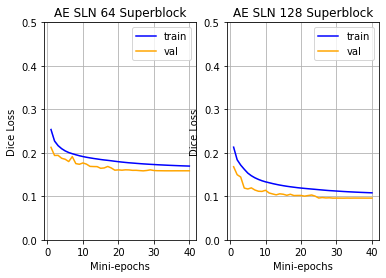

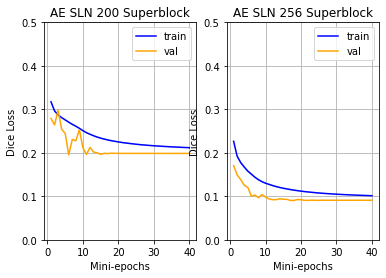

In [10]:
print("configuring combined plots")
domain = len(train_scores5)
x_values = [i+1 for i in range(domain)]

a5 = plt.subplot(1,2,1)
a5.set_ylim([0, 0.5])
plt.title("AE SLN 64 Superblock")
plt.xlabel("Mini-epochs")
plt.ylabel("Dice Loss")

ziptrainup = [a + b for a, b in zip(train_scores5, train_var_5)]
ziptraindown = [a - b for a, b in zip(train_scores5, train_var_5)]
zipvalup = [a + b for a, b in zip(val_scores5, val_var_5)]
zipvaldown = [a - b for a, b in zip(val_scores5, val_var_5)]

plt.plot(x_values, train_scores5, color="blue", label="train")
a5.fill_between(x_values, ziptrainup, ziptraindown, facecolor='lightskyblue', alpha=0.5)
plt.plot(x_values, val_scores5, color="orange", label="val")
a5.fill_between(x_values, zipvalup, zipvaldown, facecolor='navajowhite', alpha=0.5)

plt.legend()
plt.grid()

a6 = plt.subplot(1,2,2)
a6.set_ylim([0, 0.5])
plt.title("AE SLN 128 Superblock")
plt.xlabel("Mini-epochs")
plt.ylabel("Dice Loss")

ziptrainup = [a + b for a, b in zip(train_scores6, train_var_6)]
ziptraindown = [a - b for a, b in zip(train_scores6, train_var_6)]
zipvalup = [a + b for a, b in zip(val_scores6, val_var_6)]
zipvaldown = [a - b for a, b in zip(val_scores6, val_var_6)]

plt.plot(x_values, train_scores6, color="blue", label="train")
a6.fill_between(x_values, ziptrainup, ziptraindown, facecolor='lightskyblue', alpha=0.5)
plt.plot(x_values, val_scores6, color="orange", label="val")
a6.fill_between(x_values, zipvalup, zipvaldown, facecolor='navajowhite', alpha=0.5)

plt.legend()
plt.grid()

plt.show()

a7 = plt.subplot(1,2,1)
a7.set_ylim([0, 0.5])
plt.title("AE SLN 200 Superblock")
plt.xlabel("Mini-epochs")
plt.ylabel("Dice Loss")

ziptrainup = [a + b for a, b in zip(train_scores7, train_var_7)]
ziptraindown = [a - b for a, b in zip(train_scores7, train_var_7)]
zipvalup = [a + b for a, b in zip(val_scores7, val_var_7)]
zipvaldown = [a - b for a, b in zip(val_scores7, val_var_7)]

plt.plot(x_values, train_scores7, color="blue", label="train")
a7.fill_between(x_values, ziptrainup, ziptraindown, facecolor='lightskyblue', alpha=0.5)
plt.plot(x_values, val_scores7, color="orange", label="val")
a7.fill_between(x_values, zipvalup, zipvaldown, facecolor='navajowhite', alpha=0.5)

plt.legend()
plt.grid()

a8 = plt.subplot(1,2,2)
a8.set_ylim([0, 0.5])
plt.title("AE SLN 256 Superblock")
plt.xlabel("Mini-epochs")
plt.ylabel("Dice Loss")

ziptrainup = [a + b for a, b in zip(train_scores8, train_var_8)]
ziptraindown = [a - b for a, b in zip(train_scores8, train_var_8)]
zipvalup = [a + b for a, b in zip(val_scores8, val_var_8)]
zipvaldown = [a - b for a, b in zip(val_scores8, val_var_8)]

plt.plot(x_values, train_scores8, color="blue", label="train")
a8.fill_between(x_values, ziptrainup, ziptraindown, facecolor='lightskyblue', alpha=0.5)
plt.plot(x_values, val_scores8, color="orange", label="val")
a8.fill_between(x_values, zipvalup, zipvaldown, facecolor='navajowhite', alpha=0.5)

plt.legend()
plt.grid()

In [6]:
net1_W = np.load("/home/vib9/src/SL-Net/superlayer/models/superblocks/SLN_64.npy")
net5_W = np.load("/home/vib9/src/SL-Net/superlayer/models/superblocks/AE_64.npy")[32:,:,:,:]
net6_W = np.load("/home/vib9/src/SL-Net/superlayer/models/superblocks/AE_128.npy")[64:,:,:,:]
net7_W = np.load("/home/vib9/src/SL-Net/superlayer/models/superblocks/AE_200.npy")[100:,:,:,:]
net8_W = np.load("/home/vib9/src/SL-Net/superlayer/models/superblocks/AE_256.npy")[128:,:,:,:]

In [7]:
enc_nf = [32, 32, 32, 32]
dec_nf = [32, 32, 32, 32]
net9 = SUnet(input_ch=1, out_ch=15, use_bn=True, enc_nf=enc_nf, dec_nf=dec_nf, ignore_last=False, W=net5_W)

logging.info(f'Network:\n'
             f'\t{1} input channels\n'
             f'\t{15} output channels (classes)\n')

net9.to(device=device)
train_scores9, val_scores9, train_var_9, val_var_9 = train_net(net=net9,
                                                                epochs=8,
                                                                batch_size=args.batchsize,
                                                                lr=args.lr,
                                                                device=device,
                                                                img_scale=args.scale,
                                                                val_percent=args.val / 100,
                                                                checkpoint=2,
                                                                target_label_numbers=target_label_numbers,
                                                                writer=writer,
                                                                train_path=dir_train,
                                                                val_path=dir_val)

(32, 64, 3, 3)


INFO: Network:
	1 input channels
	15 output channels (classes)

INFO: Creating dataset with 7329 examples
INFO: Creating dataset with 7329 examples
INFO: Starting training:
        Epochs:          8
        Batch size:      8
        Learning rate:   0.001
        Training size:   7329
        Validation size: 7329
        Checkpoints:     True
        Device:          cuda
        Images scaling:  1
    
Validation round:  50%|████▉     | 456/916 [00:23<00:29, 15.65batch/s]


Validation round: 100%|█████████▉| 913/916 [00:45<00:00, 22.49batch/s]
                                                                      INFO: Validation Dice Loss: 0.20329602407576217


Validation round:  53%|█████▎    | 484/916 [00:24<00:21, 19.83batch/s]


Validation round: 100%|█████████▉| 915/916 [00:45<00:00, 21.74batch/s]
                                                                      INFO: Validation Dice Loss: 0.1893097084975399
Validation round:   6%|▌         | 52/916 [00:03<00:54, 15.87batch/s]


Validation round:  59%|█████▉    | 544/916 [00:27<00:17, 21.15batch/s]


Validation round:  99%|█████████▉| 911/916 [00:45<00:00, 16.25batch/s]
                                                                      INFO: Validation Dice Loss: 0.190233842416882
Validation round:  18%|█▊        | 168/916 [00:08<00:36, 20.54batch/s]


Validation round:  78%|███████▊  | 716/916 [00:36<00:10, 19.33batch/s]


Validation round: 100%|█████████▉| 915/916 [00:45<00:00, 15.47batch/s]
                                                                      INFO: Validation Dice Loss: 0.1855650634451985
Validation round:  35%|███▌      | 325/916 [00:17<00:27, 21.57batch/s]


Validation round:  94%|█████████▎| 857/916 [00:43<00:03, 19.01batch/s]


Validation round: 100%|██████████| 916/916 [00:46<00:00, 13.15batch/s]
                                                                      INFO: Validation Dice Loss: 0.17677426548048397
Epoch 1/8: 100%|██████████| 7329/7329 [04:39<00:00, 26.25img/s, loss (batch)=0.551] 
INFO: Checkpoint 1 saved !
Validation round:  40%|███▉      | 366/916 [00:22<00:29, 18.75batch/s]


Validation round:  93%|█████████▎| 850/916 [00:47<00:04, 15.00batch/s]


Validation round:  99%|█████████▉| 910/916 [00:50<00:00, 18.54batch/s]
                                                                      INFO: Validation Dice Loss: 0.17741210200705904
Validation round:  41%|████      | 376/916 [00:20<00:32, 16.65batch/s]


Validation round:  92%|█████████▏| 843/916 [00:45<00:04, 14.72batch/s]


Validation round: 100%|█████████▉| 914/916 [00:50<00:00, 12.32batch/s]
                                                                      INFO: Validation Dice Loss: 0.17548027528880986
Validation round:  24%|██▎       | 217/916 [00:19<01:11,  9.81batch/s]


Validation round:  56%|█████▋    | 517/916 [00:44<00:36, 11.04batch/s]


Validation round:  94%|█████████▎| 858/916 [01:13<00:05, 11.10batch/s]


Validation round: 100%|█████████▉| 915/916 [01:18<00:00, 12.07batch/s]
                                                                      INFO: Validation Dice Loss: 0.1699240208810854
Validation round:  28%|██▊       | 261/916 [00:23<00:49, 13.28batch/s]


Validation round:  51%|█████▏    | 471/916 [00:58<01:36,  4.59batch/s]


Validation round:  82%|████████▏ | 750/916 [01:28<00:17,  9.46batch/s]


Validation round: 100%|█████████▉| 912/916 [01:44<00:00,  9.72batch/s]
                                                                      INFO: Validation Dice Loss: 0.1637199380593659
Validation round:  16%|█▌        | 146/916 [00:14<01:40,  7.63batch/s]


Validation round:  53%|█████▎    | 483/916 [00:45<00:35, 12.23batch/s]


Validation round:  89%|████████▉ | 813/916 [01:15<00:08, 12.76batch/s]


Validation round: 100%|█████████▉| 913/916 [01:24<00:00, 10.97batch/s]
                                                                      INFO: Validation Dice Loss: 0.16153213220717605
Epoch 2/8: 100%|██████████| 7329/7329 [07:13<00:00, 16.90img/s, loss (batch)=0.406]
INFO: Checkpoint 2 saved !
Validation round:  22%|██▏       | 197/916 [00:17<01:01, 11.70batch/s]


Validation round:  52%|█████▏    | 476/916 [00:42<00:35, 12.34batch/s]


Validation round:  84%|████████▍ | 771/916 [01:09<00:14, 10.06batch/s]


Validation round: 100%|█████████▉| 913/916 [01:21<00:00, 15.07batch/s]
                                                                      INFO: Validation Dice Loss: 0.16276272187847238
Validation round:  27%|██▋       | 249/916 [00:20<00:57, 11.55batch/s]


Validation round:  74%|███████▍  | 678/916 [00:50<00:14, 15.93batch/s]


Validation round: 100%|█████████▉| 913/916 [01:07<00:00, 12.20batch/s]
                                                                      INFO: Validation Dice Loss: 0.159082355294946
Validation round:  18%|█▊        | 169/916 [00:12<00:56, 13.20batch/s]


Validation round:  65%|██████▍   | 594/916 [00:41<00:27, 11.82batch/s]


Validation round: 100%|█████████▉| 914/916 [01:02<00:00, 13.74batch/s]
                                                                      INFO: Validation Dice Loss: 0.15983533299646002
Validation round:   5%|▍         | 42/916 [00:05<02:17,  6.37batch/s]


Validation round:  35%|███▍      | 319/916 [00:31<00:51, 11.53batch/s]


Validation round:  65%|██████▌   | 599/916 [00:58<00:35,  9.00batch/s]


Validation round:  95%|█████████▍| 870/916 [01:23<00:05,  8.09batch/s]


Validation round: 100%|██████████| 916/916 [01:27<00:00, 11.90batch/s]
                                                                      INFO: Validation Dice Loss: 0.15812179082638572
Validation round:  29%|██▉       | 266/916 [00:25<01:12,  8.95batch/s]


Validation round:  63%|██████▎   | 577/916 [00:52<00:29, 11.57batch/s]


Validation round:  94%|█████████▍| 864/916 [01:18<00:04, 10.86batch/s]


Validation round: 100%|█████████▉| 914/916 [01:23<00:00, 10.31batch/s]
                                                                      INFO: Validation Dice Loss: 0.1611398127596972
Epoch 3/8: 100%|██████████| 7329/7329 [07:33<00:00, 16.17img/s, loss (batch)=0.243]
INFO: Checkpoint 3 saved !
Validation round:  25%|██▌       | 230/916 [00:22<00:58, 11.79batch/s]


Validation round:  57%|█████▋    | 522/916 [00:50<00:42,  9.21batch/s]


Validation round:  90%|█████████ | 828/916 [01:18<00:07, 12.24batch/s]


Validation round: 100%|█████████▉| 914/916 [01:27<00:00,  9.05batch/s]
                                                                      INFO: Validation Dice Loss: 0.16062906330784857
Validation round:  22%|██▏       | 201/916 [00:19<01:16,  9.30batch/s]


Validation round:  59%|█████▊    | 537/916 [00:48<00:38,  9.96batch/s]


Validation round:  95%|█████████▍| 867/916 [01:17<00:05,  8.98batch/s]


Validation round: 100%|█████████▉| 914/916 [01:21<00:00, 13.17batch/s]
                                                                      INFO: Validation Dice Loss: 0.15787070483685062
Validation round:  39%|███▊      | 353/916 [00:24<00:48, 11.63batch/s]


Validation round:  85%|████████▌ | 783/916 [00:51<00:09, 13.42batch/s]


Validation round: 100%|██████████| 916/916 [00:59<00:00, 15.71batch/s]
                                                                      INFO: Validation Dice Loss: 0.15894924166030758
Validation round:  34%|███▍      | 314/916 [00:20<00:46, 12.91batch/s]


Validation round:  82%|████████▏ | 754/916 [00:46<00:11, 13.61batch/s]


Validation round: 100%|█████████▉| 914/916 [00:55<00:00, 15.70batch/s]
                                                                      INFO: Validation Dice Loss: 0.16000363800072775
Validation round:  28%|██▊       | 255/916 [00:16<00:43, 15.12batch/s]


Validation round:  77%|███████▋  | 709/916 [00:44<00:15, 13.38batch/s]


Validation round: 100%|█████████▉| 912/916 [00:57<00:00, 15.32batch/s]
                                                                      INFO: Validation Dice Loss: 0.16015692710811394
Epoch 4/8: 100%|██████████| 7329/7329 [06:51<00:00, 17.80img/s, loss (batch)=0.251] 
INFO: Checkpoint 4 saved !
Validation round:  26%|██▌       | 240/916 [00:15<00:44, 15.23batch/s]


Validation round:  68%|██████▊   | 625/916 [00:41<00:22, 12.70batch/s]


Validation round:  99%|█████████▉| 911/916 [00:59<00:00, 14.13batch/s]
                                                                      INFO: Validation Dice Loss: 0.1543723556932924
Validation round:  16%|█▌        | 145/916 [00:09<00:55, 13.86batch/s]


Validation round:  72%|███████▏  | 657/916 [00:37<00:14, 18.05batch/s]


Validation round: 100%|██████████| 916/916 [00:52<00:00, 19.56batch/s]
                                                                      INFO: Validation Dice Loss: 0.15535798418339683
Validation round:  16%|█▌        | 143/916 [00:09<00:55, 13.89batch/s]


Validation round:  64%|██████▍   | 587/916 [00:39<00:27, 11.81batch/s]


Validation round: 100%|██████████| 916/916 [00:59<00:00, 18.86batch/s]
                                                                      INFO: Validation Dice Loss: 0.15486349455003656
Validation round:  12%|█▏        | 113/916 [00:07<00:50, 16.02batch/s]


Validation round:  61%|██████    | 556/916 [00:34<00:26, 13.66batch/s]


Validation round: 100%|█████████▉| 915/916 [00:57<00:00, 16.20batch/s]
                                                                      INFO: Validation Dice Loss: 0.1542326426418197
Validation round:   7%|▋         | 60/916 [00:04<00:50, 17.03batch/s]


Validation round:  54%|█████▍    | 499/916 [00:30<00:35, 11.68batch/s]


Validation round: 100%|█████████▉| 915/916 [00:54<00:00, 21.83batch/s]
                                                                      INFO: Validation Dice Loss: 0.15556725563570922
Epoch 5/8: 100%|██████████| 7329/7329 [05:39<00:00, 21.57img/s, loss (batch)=0.187] 
INFO: Checkpoint 5 saved !
Validation round:   3%|▎         | 25/916 [00:02<01:33,  9.55batch/s]


Validation round:  57%|█████▋    | 519/916 [00:30<00:21, 18.39batch/s]


Validation round: 100%|█████████▉| 914/916 [00:52<00:00, 17.15batch/s]
                                                                      INFO: Validation Dice Loss: 0.15424968267274475
Validation round:   2%|▏         | 14/916 [00:01<05:31,  2.72batch/s]


Validation round:  46%|████▋     | 425/916 [00:25<00:35, 13.76batch/s]


Validation round: 100%|█████████▉| 912/916 [00:51<00:00, 18.71batch/s]
                                                                      INFO: Validation Dice Loss: 0.15529554874095333
Validation round:   5%|▌         | 49/916 [00:03<01:13, 11.75batch/s]


Validation round:  62%|██████▏   | 565/916 [00:29<00:15, 23.08batch/s]


Validation round:  99%|█████████▉| 909/916 [00:44<00:00, 21.40batch/s]
                                                                      INFO: Validation Dice Loss: 0.1544283287900634
Validation round:  27%|██▋       | 244/916 [00:10<00:25, 25.92batch/s]


Validation round:  82%|████████▏ | 754/916 [00:32<00:06, 25.36batch/s]


Validation round: 100%|█████████▉| 915/916 [00:39<00:00, 19.48batch/s]
                                                                      INFO: Validation Dice Loss: 0.15442958976829416
Validation round:  40%|███▉      | 366/916 [00:16<00:24, 22.89batch/s]


Validation round: 100%|█████████▉| 913/916 [00:38<00:00, 25.32batch/s]
                                                                      INFO: Validation Dice Loss: 0.154427891540215
Epoch 6/8: 100%|██████████| 7329/7329 [04:34<00:00, 26.66img/s, loss (batch)=0.274] 
INFO: Checkpoint 6 saved !
Validation round:   9%|▊         | 80/916 [00:04<00:38, 21.54batch/s]


Validation round:  75%|███████▌  | 688/916 [00:29<00:10, 22.50batch/s]


Validation round: 100%|█████████▉| 915/916 [00:38<00:00, 24.67batch/s]
                                                                      INFO: Validation Dice Loss: 0.15446224417456111
Validation round:  50%|████▉     | 455/916 [00:20<00:21, 21.87batch/s]


Validation round: 100%|█████████▉| 915/916 [00:40<00:00, 18.17batch/s]
                                                                      INFO: Validation Dice Loss: 0.1544998786839205
Validation round:  15%|█▌        | 140/916 [00:06<00:33, 23.13batch/s]


Validation round:  90%|████████▉ | 821/916 [00:34<00:05, 18.50batch/s]


Validation round:  99%|█████████▉| 911/916 [00:39<00:00, 19.74batch/s]
                                                                      INFO: Validation Dice Loss: 0.1546097134187102
Validation round:  33%|███▎      | 302/916 [00:17<00:34, 17.56batch/s]


Validation round:  75%|███████▍  | 685/916 [00:39<00:11, 19.84batch/s]


Validation round:  99%|█████████▉| 911/916 [00:56<00:00, 13.05batch/s]
                                                                      INFO: Validation Dice Loss: 0.15461124383791566
Validation round:  11%|█▏        | 105/916 [00:08<00:53, 15.26batch/s]


Validation round:  53%|█████▎    | 486/916 [00:33<00:30, 13.94batch/s]


Validation round:  94%|█████████▍| 864/916 [00:56<00:03, 16.15batch/s]


Validation round: 100%|█████████▉| 915/916 [00:59<00:00, 16.43batch/s]
                                                                      INFO: Validation Dice Loss: 0.1545964111797674
Epoch 7/8: 100%|██████████| 7329/7329 [04:45<00:00, 25.69img/s, loss (batch)=0.295] 
INFO: Checkpoint 7 saved !
Validation round:  34%|███▍      | 313/916 [00:20<00:46, 13.07batch/s]


Validation round:  75%|███████▍  | 686/916 [00:43<00:12, 18.46batch/s]


Validation round: 100%|██████████| 916/916 [01:00<00:00, 17.36batch/s]
                                                                      INFO: Validation Dice Loss: 0.15458052651753332
Validation round:  12%|█▏        | 109/916 [00:07<00:49, 16.41batch/s]


Validation round:  48%|████▊     | 442/916 [00:32<00:40, 11.73batch/s]


Validation round:  90%|████████▉ | 824/916 [00:57<00:06, 14.17batch/s]


Validation round: 100%|██████████| 916/916 [01:03<00:00, 14.99batch/s]
                                                                      INFO: Validation Dice Loss: 0.1545802793144269
Validation round:  28%|██▊       | 256/916 [00:19<00:53, 12.42batch/s]


Validation round:  77%|███████▋  | 707/916 [00:42<00:10, 19.57batch/s]


Validation round: 100%|█████████▉| 913/916 [00:52<00:00, 25.10batch/s]
                                                                      INFO: Validation Dice Loss: 0.15457943474719357
Validation round:  32%|███▏      | 295/916 [00:15<00:29, 20.84batch/s]


Validation round:  88%|████████▊ | 809/916 [00:38<00:05, 18.95batch/s]


Validation round: 100%|██████████| 916/916 [00:43<00:00, 23.67batch/s]
                                                                      INFO: Validation Dice Loss: 0.15457794157275725
Validation round:  52%|█████▏    | 478/916 [00:22<00:23, 18.50batch/s]


Validation round: 100%|█████████▉| 913/916 [00:45<00:00, 17.03batch/s]
                                                                      INFO: Validation Dice Loss: 0.15457858171265199
Epoch 8/8: 100%|██████████| 7329/7329 [05:16<00:00, 23.17img/s, loss (batch)=0.36]  
INFO: Checkpoint 8 saved !


In [8]:
enc_nf = [64, 64, 64, 64]
dec_nf = [64, 64, 64, 64]
net10 = SUnet(input_ch=1, out_ch=15, use_bn=True, enc_nf=enc_nf, dec_nf=dec_nf, ignore_last=False, W=net6_W)

logging.info(f'Network:\n'
             f'\t{1} input channels\n'
             f'\t{15} output channels (classes)\n')

net10.to(device=device)
train_scores10, val_scores10, train_var_10, val_var_10 = train_net(net=net10,
                                                                epochs=8,
                                                                batch_size=args.batchsize,
                                                                lr=args.lr,
                                                                device=device,
                                                                img_scale=args.scale,
                                                                val_percent=args.val / 100,
                                                                checkpoint=2,
                                                                target_label_numbers=target_label_numbers,
                                                                writer=writer,
                                                                train_path=dir_train,
                                                                val_path=dir_val)

INFO: Network:
	1 input channels
	15 output channels (classes)

INFO: Creating dataset with 7329 examples
INFO: Creating dataset with 7329 examples
INFO: Starting training:
        Epochs:          8
        Batch size:      8
        Learning rate:   0.001
        Training size:   7329
        Validation size: 7329
        Checkpoints:     True
        Device:          cuda
        Images scaling:  1
    
Epoch 1/8:   0%|          | 0/7329 [00:00<?, ?img/s]

(64, 128, 3, 3)


Validation round:  48%|████▊     | 439/916 [00:24<00:29, 16.18batch/s]


Validation round:  99%|█████████▉| 911/916 [00:49<00:00, 15.15batch/s]
                                                                      INFO: Validation Dice Loss: 0.19838541262990522
Validation round:   0%|          | 0/916 [00:00<?, ?batch/s]


Validation round:  53%|█████▎    | 488/916 [00:25<00:22, 18.70batch/s]


Validation round: 100%|██████████| 916/916 [00:47<00:00, 20.72batch/s]
                                                                      INFO: Validation Dice Loss: 0.1680855255850538
Validation round:   3%|▎         | 25/916 [00:02<01:52,  7.93batch/s]


Validation round:  58%|█████▊    | 533/916 [00:28<00:25, 15.18batch/s]


Validation round:  99%|█████████▉| 911/916 [00:50<00:00, 15.86batch/s]
                                                                      INFO: Validation Dice Loss: 0.1599629169826164
Validation round:   4%|▎         | 34/916 [00:02<01:43,  8.52batch/s]


Validation round:  51%|█████▏    | 471/916 [00:28<00:31, 14.16batch/s]


Validation round:  97%|█████████▋| 888/916 [00:53<00:02, 13.60batch/s]


Validation round:  99%|█████████▉| 909/916 [00:54<00:00, 13.94batch/s]
                                                                      INFO: Validation Dice Loss: 0.15834641467177973
Validation round:  45%|████▍     | 412/916 [00:24<00:33, 15.15batch/s]


Validation round:  99%|█████████▉| 909/916 [00:51<00:00, 22.60batch/s]
                                                                      INFO: Validation Dice Loss: 0.15967539634441705
Epoch 1/8: 100%|██████████| 7329/7329 [05:05<00:00, 23.99img/s, loss (batch)=0.378] 
INFO: Checkpoint 1 saved !
Validation round:   0%|          | 1/916 [00:00<14:08,  1.08batch/s]


Validation round:  53%|█████▎    | 487/916 [00:26<00:28, 15.01batch/s]


Validation round:  99%|█████████▉| 911/916 [00:49<00:00, 19.01batch/s]
                                                                      INFO: Validation Dice Loss: 0.15478233220340384
Validation round:   6%|▌         | 57/916 [00:03<00:54, 15.78batch/s]


Validation round:  56%|█████▋    | 516/916 [00:28<00:21, 19.03batch/s]


Validation round:  99%|█████████▉| 909/916 [00:50<00:00, 15.06batch/s]
                                                                      INFO: Validation Dice Loss: 0.15388162931077606
Validation round:   8%|▊         | 76/916 [00:04<00:56, 14.87batch/s]


Validation round:  64%|██████▍   | 588/916 [00:32<00:14, 22.15batch/s]


Validation round: 100%|█████████▉| 914/916 [00:49<00:00, 18.14batch/s]
                                                                      INFO: Validation Dice Loss: 0.14964713611717306
Validation round:  17%|█▋        | 153/916 [00:08<00:45, 16.78batch/s]


Validation round:  66%|██████▌   | 606/916 [00:32<00:23, 13.29batch/s]


Validation round: 100%|██████████| 916/916 [00:48<00:00, 20.28batch/s]
                                                                      INFO: Validation Dice Loss: 0.14768913644467638
Validation round:  16%|█▌        | 144/916 [00:08<00:45, 16.96batch/s]


Validation round:  69%|██████▉   | 632/916 [00:34<00:12, 22.15batch/s]


Validation round: 100%|█████████▉| 914/916 [00:48<00:00, 20.23batch/s]
                                                                      INFO: Validation Dice Loss: 0.14517004344628628
Epoch 2/8: 100%|██████████| 7329/7329 [04:56<00:00, 24.72img/s, loss (batch)=0.374] 
INFO: Checkpoint 2 saved !
Validation round:  23%|██▎       | 208/916 [00:11<00:32, 21.95batch/s]


Validation round:  77%|███████▋  | 709/916 [00:37<00:10, 20.49batch/s]


Validation round: 100%|█████████▉| 913/916 [00:47<00:00, 17.55batch/s]
                                                                      INFO: Validation Dice Loss: 0.1447526812228053
Validation round:  29%|██▊       | 263/916 [00:13<00:29, 22.45batch/s]


Validation round:  89%|████████▉ | 815/916 [00:39<00:04, 21.44batch/s]


Validation round: 100%|██████████| 916/916 [00:43<00:00, 24.76batch/s]
                                                                      INFO: Validation Dice Loss: 0.14134232409493633
Validation round:  49%|████▉     | 452/916 [00:20<00:18, 24.47batch/s]


Validation round: 100%|██████████| 916/916 [00:42<00:00, 22.64batch/s]
                                                                      INFO: Validation Dice Loss: 0.14041055786915482
Validation round:   2%|▏         | 16/916 [00:01<04:09,  3.60batch/s]


Validation round:  66%|██████▌   | 601/916 [00:25<00:19, 15.87batch/s]


Validation round: 100%|█████████▉| 914/916 [00:41<00:00, 23.08batch/s]
                                                                      INFO: Validation Dice Loss: 0.1392512469426383
Validation round:  22%|██▏       | 197/916 [00:09<00:34, 20.62batch/s]


Validation round:  88%|████████▊ | 805/916 [00:37<00:04, 22.21batch/s]


Validation round: 100%|█████████▉| 914/916 [00:41<00:00, 26.58batch/s]
                                                                      INFO: Validation Dice Loss: 0.13814682493954247
Epoch 3/8: 100%|██████████| 7329/7329 [04:20<00:00, 28.18img/s, loss (batch)=0.244]
INFO: Checkpoint 3 saved !
Validation round:  40%|███▉      | 366/916 [00:17<00:28, 19.51batch/s]


Validation round:  96%|█████████▌| 881/916 [00:41<00:01, 19.88batch/s]


Validation round: 100%|█████████▉| 913/916 [00:43<00:00, 22.07batch/s]
                                                                      INFO: Validation Dice Loss: 0.1370900104708937
Validation round:  53%|█████▎    | 482/916 [00:19<00:18, 23.09batch/s]


Validation round: 100%|█████████▉| 914/916 [00:37<00:00, 25.60batch/s]
                                                                      INFO: Validation Dice Loss: 0.1351987174732456
Validation round:  18%|█▊        | 167/916 [00:07<00:25, 28.87batch/s]


Validation round:  72%|███████▏  | 664/916 [00:31<00:12, 20.36batch/s]


Validation round: 100%|█████████▉| 914/916 [00:44<00:00, 15.70batch/s]
                                                                      INFO: Validation Dice Loss: 0.13355999487944306
Validation round:  24%|██▍       | 220/916 [00:10<00:35, 19.76batch/s]


Validation round:  80%|████████  | 734/916 [00:33<00:08, 22.19batch/s]


Validation round: 100%|██████████| 916/916 [00:41<00:00, 21.19batch/s]
                                                                      INFO: Validation Dice Loss: 0.13647857190447343
Validation round:  30%|███       | 276/916 [00:12<00:32, 19.50batch/s]


Validation round:  93%|█████████▎| 854/916 [00:36<00:02, 21.62batch/s]


Validation round: 100%|█████████▉| 912/916 [00:39<00:00, 19.46batch/s]
                                                                      INFO: Validation Dice Loss: 0.13343866127156795
Epoch 4/8: 100%|██████████| 7329/7329 [04:06<00:00, 29.71img/s, loss (batch)=0.291] 
INFO: Checkpoint 4 saved !
Validation round:  49%|████▉     | 452/916 [00:20<00:18, 25.27batch/s]


Validation round: 100%|█████████▉| 915/916 [00:43<00:00, 20.78batch/s]
                                                                      INFO: Validation Dice Loss: 0.1340060490285205
Validation round:   7%|▋         | 67/916 [00:03<00:40, 20.80batch/s]


Validation round:  58%|█████▊    | 531/916 [00:26<00:22, 17.44batch/s]


Validation round: 100%|█████████▉| 915/916 [00:45<00:00, 24.96batch/s]
                                                                      INFO: Validation Dice Loss: 0.13315502123899076
Validation round:  10%|█         | 92/916 [00:05<00:47, 17.20batch/s]


Validation round:  58%|█████▊    | 530/916 [00:25<00:18, 20.32batch/s]


Validation round: 100%|█████████▉| 913/916 [00:44<00:00, 20.97batch/s]
                                                                      INFO: Validation Dice Loss: 0.13333711636508916
Validation round:   9%|▉         | 85/916 [00:04<00:41, 20.14batch/s]


Validation round:  67%|██████▋   | 616/916 [00:28<00:15, 18.86batch/s]


Validation round: 100%|█████████▉| 912/916 [00:41<00:00, 22.18batch/s]
                                                                      INFO: Validation Dice Loss: 0.13623189806580283
Validation round:  32%|███▏      | 289/916 [00:13<00:30, 20.63batch/s]


Validation round:  95%|█████████▍| 869/916 [00:37<00:02, 21.05batch/s]


Validation round:  99%|█████████▉| 909/916 [00:38<00:00, 23.17batch/s]
                                                                      INFO: Validation Dice Loss: 0.13243046146715834
Epoch 5/8: 100%|██████████| 7329/7329 [04:16<00:00, 28.62img/s, loss (batch)=0.287] 
INFO: Checkpoint 5 saved !
Validation round:  48%|████▊     | 444/916 [00:18<00:19, 24.64batch/s]


Validation round:  99%|█████████▉| 910/916 [00:37<00:00, 23.71batch/s]
                                                                      INFO: Validation Dice Loss: 0.13243548974687616
Validation round:   3%|▎         | 26/916 [00:01<01:58,  7.48batch/s]


Validation round:  57%|█████▋    | 525/916 [00:21<00:16, 23.61batch/s]


Validation round: 100%|█████████▉| 914/916 [00:37<00:00, 27.00batch/s]
                                                                      INFO: Validation Dice Loss: 0.13274294138768095
Validation round:  14%|█▍        | 129/916 [00:05<00:30, 26.18batch/s]


Validation round:  80%|████████  | 736/916 [00:31<00:07, 23.62batch/s]


Validation round: 100%|█████████▉| 912/916 [00:38<00:00, 23.87batch/s]
                                                                      INFO: Validation Dice Loss: 0.13266563046251842
Validation round:  54%|█████▎    | 492/916 [00:20<00:20, 20.80batch/s]


Validation round: 100%|█████████▉| 915/916 [00:38<00:00, 25.93batch/s]
                                                                      INFO: Validation Dice Loss: 0.12945371899574865
Validation round:  26%|██▋       | 241/916 [00:10<00:29, 22.88batch/s]


Validation round:  92%|█████████▏| 846/916 [00:34<00:02, 24.99batch/s]


Validation round: 100%|█████████▉| 913/916 [00:37<00:00, 21.38batch/s]
                                                                      INFO: Validation Dice Loss: 0.12958037122010405
Epoch 6/8: 100%|██████████| 7329/7329 [03:47<00:00, 32.16img/s, loss (batch)=0.304] 
INFO: Checkpoint 6 saved !
Validation round:  45%|████▌     | 413/916 [00:17<00:22, 22.67batch/s]


Validation round: 100%|█████████▉| 915/916 [00:38<00:00, 22.49batch/s]
                                                                      INFO: Validation Dice Loss: 0.1285472537378687
Validation round:  17%|█▋        | 153/916 [00:07<00:35, 21.66batch/s]


Validation round:  67%|██████▋   | 611/916 [00:25<00:10, 28.48batch/s]


Validation round: 100%|██████████| 916/916 [00:38<00:00, 24.08batch/s]
                                                                      INFO: Validation Dice Loss: 0.127966617563471
Validation round:  33%|███▎      | 306/916 [00:13<00:20, 29.20batch/s]


Validation round: 100%|█████████▉| 915/916 [00:37<00:00, 26.79batch/s]
                                                                      INFO: Validation Dice Loss: 0.12806635878687342
Validation round:   4%|▍         | 38/916 [00:02<01:10, 12.38batch/s]


Validation round:  70%|██████▉   | 639/916 [00:26<00:13, 20.72batch/s]


Validation round: 100%|██████████| 916/916 [00:37<00:00, 26.48batch/s]
                                                                      INFO: Validation Dice Loss: 0.12793002634687456
Validation round:  33%|███▎      | 300/916 [00:12<00:27, 22.29batch/s]


Validation round: 100%|█████████▉| 915/916 [00:37<00:00, 26.81batch/s]
                                                                      INFO: Validation Dice Loss: 0.12769389923613145
Epoch 7/8: 100%|██████████| 7329/7329 [03:49<00:00, 31.94img/s, loss (batch)=0.262] 
INFO: Checkpoint 7 saved !
Validation round:   0%|          | 0/916 [00:00<?, ?batch/s]


Validation round:  75%|███████▌  | 688/916 [00:29<00:08, 25.67batch/s]


Validation round: 100%|█████████▉| 915/916 [00:38<00:00, 27.65batch/s]
                                                                      INFO: Validation Dice Loss: 0.12833176815971797
Validation round:  41%|████      | 376/916 [00:16<00:21, 25.12batch/s]


Validation round: 100%|█████████▉| 913/916 [00:39<00:00, 25.24batch/s]
                                                                      INFO: Validation Dice Loss: 0.12886594588904923
Validation round:  13%|█▎        | 121/916 [00:05<00:33, 23.87batch/s]


Validation round:  68%|██████▊   | 623/916 [00:26<00:13, 21.36batch/s]


Validation round: 100%|██████████| 916/916 [00:38<00:00, 26.47batch/s]
                                                                      INFO: Validation Dice Loss: 0.12909388403900326
Validation round:  29%|██▉       | 268/916 [00:12<00:33, 19.37batch/s]


Validation round: 100%|█████████▉| 912/916 [00:38<00:00, 23.91batch/s]
                                                                      INFO: Validation Dice Loss: 0.1274723047349911
Validation round:   0%|          | 1/916 [00:00<11:35,  1.32batch/s]


Validation round:  55%|█████▌    | 507/916 [00:23<00:17, 22.95batch/s]


Validation round: 100%|█████████▉| 913/916 [00:40<00:00, 22.89batch/s]
                                                                      INFO: Validation Dice Loss: 0.12781249908283027
Epoch 8/8: 100%|██████████| 7329/7329 [03:54<00:00, 31.23img/s, loss (batch)=0.311] 
INFO: Checkpoint 8 saved !


In [9]:
enc_nf = [100, 100, 100, 100]
dec_nf = [100, 100, 100, 100]
net11 = SUnet(input_ch=1, out_ch=15, use_bn=True, enc_nf=enc_nf, dec_nf=dec_nf, ignore_last=False, W=net7_W)

logging.info(f'Network:\n'
             f'\t{1} input channels\n'
             f'\t{15} output channels (classes)\n')

net11.to(device=device)
train_scores11, val_scores11, train_var_11, val_var_11 = train_net(net=net11,
                                                                epochs=8,
                                                                batch_size=args.batchsize,
                                                                lr=args.lr,
                                                                device=device,
                                                                img_scale=args.scale,
                                                                val_percent=args.val / 100,
                                                                checkpoint=2,
                                                                target_label_numbers=target_label_numbers,
                                                                writer=writer,
                                                                train_path=dir_train,
                                                                val_path=dir_val)

INFO: Network:
	1 input channels
	15 output channels (classes)

INFO: Creating dataset with 7329 examples
INFO: Creating dataset with 7329 examples
INFO: Starting training:
        Epochs:          8
        Batch size:      8
        Learning rate:   0.001
        Training size:   7329
        Validation size: 7329
        Checkpoints:     True
        Device:          cuda
        Images scaling:  1
    
Epoch 1/8:   0%|          | 0/7329 [00:00<?, ?img/s]

(100, 200, 3, 3)


Epoch 1/8:  20%|█▉        | 1464/7329 [00:30<00:39, 150.18img/s, loss (batch)=0.608]


Validation round:  99%|█████████▉| 906/916 [00:38<00:00, 24.59batch/s]


Validation round: 100%|█████████▉| 914/916 [00:38<00:00, 25.34batch/s]
                                                                      INFO: Validation Dice Loss: 0.329977868425794
Validation round:  48%|████▊     | 437/916 [00:18<00:17, 27.18batch/s]


Validation round:  89%|████████▉ | 819/916 [00:36<00:06, 14.83batch/s]


Validation round: 100%|█████████▉| 915/916 [00:40<00:00, 24.15batch/s]
                                                                      INFO: Validation Dice Loss: 0.26316618115750984
Validation round:  36%|███▌      | 332/916 [00:14<00:23, 25.14batch/s]


Validation round:  86%|████████▌ | 787/916 [00:32<00:05, 22.86batch/s]


Validation round: 100%|█████████▉| 913/916 [00:37<00:00, 23.93batch/s]
                                                                      INFO: Validation Dice Loss: 0.2720021932145914
Validation round:  35%|███▍      | 319/916 [00:14<00:28, 20.89batch/s]


Validation round:  86%|████████▋ | 791/916 [00:33<00:06, 19.93batch/s]


Validation round: 100%|██████████| 916/916 [00:38<00:00, 25.14batch/s]
                                                                      INFO: Validation Dice Loss: 0.24320783482368336
Validation round:  33%|███▎      | 300/916 [00:12<00:29, 21.01batch/s]


Validation round:  80%|███████▉  | 729/916 [00:30<00:08, 21.43batch/s]


Validation round: 100%|█████████▉| 914/916 [00:37<00:00, 25.53batch/s]
                                                                      INFO: Validation Dice Loss: 0.2026307824592403
Epoch 1/8: 100%|██████████| 7329/7329 [04:05<00:00, 29.87img/s, loss (batch)=0.553] 
INFO: Checkpoint 1 saved !
Validation round:  25%|██▍       | 226/916 [00:09<00:29, 23.60batch/s]


Validation round:  72%|███████▏  | 661/916 [00:27<00:09, 27.28batch/s]


Validation round: 100%|█████████▉| 912/916 [00:37<00:00, 22.15batch/s]
                                                                      INFO: Validation Dice Loss: 0.2108486482475002
Validation round:  16%|█▋        | 151/916 [00:06<00:35, 21.70batch/s]


Validation round:  64%|██████▍   | 590/916 [00:25<00:12, 25.38batch/s]


Validation round: 100%|█████████▉| 915/916 [00:38<00:00, 25.62batch/s]
                                                                      INFO: Validation Dice Loss: 0.26340385236854635
Validation round:  10%|█         | 93/916 [00:04<00:34, 24.08batch/s]


Validation round:  57%|█████▋    | 526/916 [00:22<00:15, 25.21batch/s]


Validation round: 100%|█████████▉| 914/916 [00:38<00:00, 24.07batch/s]
                                                                      INFO: Validation Dice Loss: 0.20011661330229852
Validation round:   1%|          | 9/916 [00:01<05:51,  2.58batch/s]


Validation round:  49%|████▉     | 448/916 [00:18<00:18, 24.69batch/s]


Validation round:  97%|█████████▋| 888/916 [00:37<00:01, 19.19batch/s]


Validation round: 100%|██████████| 916/916 [00:38<00:00, 27.49batch/s]
                                                                      INFO: Validation Dice Loss: 0.2782954581765108
Epoch 2/8: 100%|█████████▉| 7304/7329 [03:40<00:00, 137.40img/s, loss (batch)=0.556]


Validation round:  87%|████████▋ | 794/916 [00:32<00:05, 23.04batch/s]


Validation round: 100%|█████████▉| 915/916 [00:37<00:00, 22.81batch/s]
                                                                      INFO: Validation Dice Loss: 0.25868204787503685
Epoch 2/8: 100%|██████████| 7329/7329 [04:03<00:00, 30.14img/s, loss (batch)=0.569] 
INFO: Checkpoint 2 saved !
Validation round:  33%|███▎      | 306/916 [00:13<00:29, 20.48batch/s]


Validation round:  80%|████████  | 735/916 [00:31<00:07, 25.55batch/s]


Validation round: 100%|█████████▉| 915/916 [00:38<00:00, 27.92batch/s]
                                                                      INFO: Validation Dice Loss: 0.3069121128672075
Validation round:  25%|██▍       | 227/916 [00:09<00:28, 24.35batch/s]


Validation round:  73%|███████▎  | 669/916 [00:28<00:09, 25.42batch/s]


Validation round: 100%|█████████▉| 915/916 [00:38<00:00, 24.78batch/s]
                                                                      INFO: Validation Dice Loss: 0.39032972805755106
Validation round:  20%|█▉        | 181/916 [00:08<00:28, 25.63batch/s]


Validation round:  68%|██████▊   | 625/916 [00:26<00:13, 21.69batch/s]


Validation round: 100%|█████████▉| 914/916 [00:38<00:00, 26.05batch/s]
                                                                      INFO: Validation Dice Loss: 0.38760635116865544
Validation round:  15%|█▍        | 135/916 [00:06<00:28, 27.03batch/s]


Validation round:  62%|██████▏   | 570/916 [00:23<00:14, 24.18batch/s]


Validation round: 100%|█████████▉| 914/916 [00:37<00:00, 26.76batch/s]
                                                                      INFO: Validation Dice Loss: 0.3815345214313815
Validation round:   8%|▊         | 73/916 [00:03<00:39, 21.20batch/s]


Validation round:  60%|█████▉    | 547/916 [00:23<00:16, 22.06batch/s]


Validation round: 100%|█████████▉| 913/916 [00:38<00:00, 27.08batch/s]
                                                                      INFO: Validation Dice Loss: 0.3915903205824731
Epoch 3/8: 100%|██████████| 7329/7329 [04:04<00:00, 30.02img/s, loss (batch)=0.578] 
INFO: Checkpoint 3 saved !
Validation round:   8%|▊         | 76/916 [00:03<00:35, 23.34batch/s]


Validation round:  56%|█████▌    | 514/916 [00:21<00:17, 22.47batch/s]


Validation round: 100%|█████████▉| 912/916 [00:37<00:00, 25.99batch/s]
                                                                      INFO: Validation Dice Loss: 0.3828268771478703
Validation round:   4%|▍         | 36/916 [00:02<01:01, 14.39batch/s]


Validation round:  53%|█████▎    | 490/916 [00:20<00:14, 28.51batch/s]


Validation round: 100%|█████████▉| 912/916 [00:37<00:00, 24.73batch/s]
                                                                      INFO: Validation Dice Loss: 0.384241554186594
Validation round:   3%|▎         | 29/916 [00:01<01:21, 10.86batch/s]


Validation round:  50%|█████     | 462/916 [00:19<00:20, 21.86batch/s]


Validation round:  99%|█████████▉| 911/916 [00:37<00:00, 24.63batch/s]


Validation round: 100%|█████████▉| 914/916 [00:37<00:00, 21.91batch/s]
                                                                      INFO: Validation Dice Loss: 0.3832604910478842
Validation round:  46%|████▌     | 421/916 [00:17<00:18, 27.23batch/s]


Validation round:  94%|█████████▍| 865/916 [00:36<00:02, 23.90batch/s]


Validation round: 100%|█████████▉| 914/916 [00:38<00:00, 25.71batch/s]
                                                                      INFO: Validation Dice Loss: 0.3835003141753018
Validation round:  40%|███▉      | 365/916 [00:15<00:22, 24.06batch/s]


Validation round:  88%|████████▊ | 808/916 [00:33<00:03, 27.24batch/s]


Validation round: 100%|█████████▉| 913/916 [00:37<00:00, 28.03batch/s]
                                                                      INFO: Validation Dice Loss: 0.38302419110156566
Epoch 4/8: 100%|██████████| 7329/7329 [04:03<00:00, 30.13img/s, loss (batch)=0.523] 
INFO: Checkpoint 4 saved !
Validation round:  37%|███▋      | 341/916 [00:14<00:30, 18.81batch/s]


Validation round:  89%|████████▉ | 813/916 [00:34<00:05, 17.84batch/s]


Validation round: 100%|██████████| 916/916 [00:38<00:00, 24.21batch/s]
                                                                      INFO: Validation Dice Loss: 0.3843093781231793
Validation round:  33%|███▎      | 299/916 [00:15<00:29, 20.58batch/s]


Validation round:  71%|███████▏  | 653/916 [00:35<00:15, 17.49batch/s]


Validation round: 100%|█████████▉| 915/916 [00:50<00:00, 22.42batch/s]
                                                                      INFO: Validation Dice Loss: 0.3841765121146061
Validation round:  12%|█▏        | 106/916 [00:06<00:50, 16.04batch/s]


Validation round:  57%|█████▋    | 521/916 [00:28<00:18, 21.10batch/s]


Validation round: 100%|█████████▉| 915/916 [00:47<00:00, 24.83batch/s]
                                                                      INFO: Validation Dice Loss: 0.38465796267882185
Validation round:   1%|          | 10/916 [00:01<04:23,  3.44batch/s]


Validation round:  45%|████▍     | 409/916 [00:21<00:23, 21.57batch/s]


Validation round:  90%|████████▉ | 820/916 [00:42<00:04, 21.29batch/s]


Validation round: 100%|██████████| 916/916 [00:46<00:00, 23.52batch/s]
                                                                      INFO: Validation Dice Loss: 0.3846635518831457
Validation round:  32%|███▏      | 294/916 [00:16<00:36, 16.82batch/s]


Validation round:  77%|███████▋  | 703/916 [00:37<00:11, 18.67batch/s]


Validation round: 100%|█████████▉| 913/916 [00:48<00:00, 18.55batch/s]
                                                                      INFO: Validation Dice Loss: 0.38460206617824894
Epoch 5/8: 100%|██████████| 7329/7329 [04:46<00:00, 25.61img/s, loss (batch)=0.553] 
INFO: Checkpoint 5 saved !
Validation round:  19%|█▉        | 172/916 [00:09<00:38, 19.23batch/s]


Validation round:  65%|██████▍   | 593/916 [00:31<00:16, 19.32batch/s]


Validation round: 100%|█████████▉| 913/916 [00:48<00:00, 21.71batch/s]
                                                                      INFO: Validation Dice Loss: 0.38464860972749093
Validation round:   8%|▊         | 72/916 [00:04<00:47, 17.87batch/s]


Validation round:  49%|████▊     | 446/916 [00:24<00:35, 13.13batch/s]


Validation round:  92%|█████████▏| 844/916 [00:46<00:03, 22.89batch/s]


Validation round: 100%|██████████| 916/916 [00:50<00:00, 23.59batch/s]
                                                                      INFO: Validation Dice Loss: 0.3846750988840536
Validation round:  33%|███▎      | 298/916 [00:17<00:40, 15.08batch/s]


Validation round:  78%|███████▊  | 711/916 [00:39<00:12, 16.62batch/s]


Validation round: 100%|██████████| 916/916 [00:50<00:00, 21.03batch/s]
                                                                      INFO: Validation Dice Loss: 0.38465244876115084
Validation round:  20%|██        | 187/916 [00:10<00:43, 16.75batch/s]


Validation round:  66%|██████▋   | 607/916 [00:32<00:16, 18.37batch/s]


Validation round: 100%|█████████▉| 914/916 [00:48<00:00, 21.22batch/s]
                                                                      INFO: Validation Dice Loss: 0.3846128759946365
Validation round:  10%|▉         | 89/916 [00:05<00:48, 16.95batch/s]


Validation round:  55%|█████▌    | 507/916 [00:26<00:22, 17.91batch/s]


Validation round: 100%|█████████▉| 912/916 [00:47<00:00, 20.80batch/s]
                                                                      INFO: Validation Dice Loss: 0.3846312150944789
Epoch 6/8: 100%|██████████| 7329/7329 [04:59<00:00, 24.46img/s, loss (batch)=0.523] 
INFO: Checkpoint 6 saved !
Validation round:   1%|          | 5/916 [00:00<08:45,  1.73batch/s]


Validation round:  44%|████▍     | 404/916 [00:22<00:31, 16.03batch/s]


Validation round:  87%|████████▋ | 795/916 [00:43<00:09, 13.24batch/s]


Validation round: 100%|█████████▉| 913/916 [00:49<00:00, 21.12batch/s]
                                                                      INFO: Validation Dice Loss: 0.3845882580074681
Validation round:  29%|██▊       | 263/916 [00:14<00:30, 21.74batch/s]


Validation round:  72%|███████▏  | 656/916 [00:34<00:12, 20.21batch/s]


Validation round: 100%|█████████▉| 915/916 [00:47<00:00, 21.54batch/s]
                                                                      INFO: Validation Dice Loss: 0.38462706541390396
Validation round:  14%|█▍        | 127/916 [00:07<00:40, 19.62batch/s]


Validation round:  59%|█████▊    | 537/916 [00:28<00:18, 20.38batch/s]


Validation round: 100%|█████████▉| 915/916 [00:47<00:00, 23.23batch/s]
                                                                      INFO: Validation Dice Loss: 0.38464284382402636
Validation round:   3%|▎         | 25/916 [00:02<01:56,  7.62batch/s]


Validation round:  45%|████▌     | 415/916 [00:22<00:30, 16.50batch/s]


Validation round:  88%|████████▊ | 807/916 [00:43<00:06, 16.61batch/s]


Validation round: 100%|██████████| 916/916 [00:48<00:00, 22.68batch/s]
                                                                      INFO: Validation Dice Loss: 0.38463527517287494
Validation round:  32%|███▏      | 297/916 [00:17<00:34, 17.88batch/s]


Validation round:  77%|███████▋  | 709/916 [00:38<00:10, 19.13batch/s]


Validation round: 100%|██████████| 916/916 [00:47<00:00, 24.27batch/s]
                                                                      INFO: Validation Dice Loss: 0.38463112057947174
Epoch 7/8: 100%|██████████| 7329/7329 [04:55<00:00, 24.82img/s, loss (batch)=0.58]  
INFO: Checkpoint 7 saved !
Validation round:  21%|██        | 188/916 [00:09<00:38, 19.11batch/s]


Validation round:  64%|██████▍   | 590/916 [00:28<00:18, 17.93batch/s]


Validation round: 100%|█████████▉| 913/916 [00:44<00:00, 26.38batch/s]
                                                                      INFO: Validation Dice Loss: 0.38466015601262254
Validation round:   9%|▊         | 79/916 [00:04<00:44, 18.91batch/s]


Validation round:  54%|█████▎    | 491/916 [00:26<00:21, 19.67batch/s]


Validation round:  98%|█████████▊| 896/916 [00:46<00:01, 19.17batch/s]


Validation round: 100%|█████████▉| 915/916 [00:46<00:00, 24.17batch/s]
                                                                      INFO: Validation Dice Loss: 0.38464124045257486
Validation round:  40%|████      | 367/916 [00:19<00:29, 18.78batch/s]


Validation round:  85%|████████▌ | 779/916 [00:39<00:05, 23.17batch/s]


Validation round: 100%|██████████| 916/916 [00:46<00:00, 18.99batch/s]
                                                                      INFO: Validation Dice Loss: 0.38465828507097527
Validation round:  28%|██▊       | 259/916 [00:13<00:30, 21.53batch/s]


Validation round:  73%|███████▎  | 671/916 [00:33<00:11, 21.57batch/s]


Validation round: 100%|█████████▉| 914/916 [00:47<00:00, 20.10batch/s]
                                                                      INFO: Validation Dice Loss: 0.3846068541035381
Validation round:  13%|█▎        | 115/916 [00:06<00:38, 20.60batch/s]


Validation round:  57%|█████▋    | 519/916 [00:28<00:22, 17.51batch/s]


Validation round: 100%|██████████| 916/916 [00:48<00:00, 24.54batch/s]


                                                                      INFO: Validation Dice Loss: 0.3846593251915478
Epoch 8/8: 100%|██████████| 7329/7329 [04:47<00:00, 25.48img/s, loss (batch)=0.532] 
INFO: Checkpoint 8 saved !


In [ ]:
enc_nf = [128, 128, 128, 128]
dec_nf = [128, 128, 128, 128]
net12 = SUnet(input_ch=1, out_ch=15, use_bn=True, enc_nf=enc_nf, dec_nf=dec_nf, ignore_last=False, W=net8_W)

logging.info(f'Network:\n'
             f'\t{1} input channels\n'
             f'\t{15} output channels (classes)\n')

net12.to(device=device)
train_scores12, val_scores12, train_var_12, val_var_12 = train_net(net=net12,
                                                                epochs=8,
                                                                batch_size=args.batchsize,
                                                                lr=args.lr,
                                                                device=device,
                                                                img_scale=args.scale,
                                                                val_percent=args.val / 100,
                                                                checkpoint=2,
                                                                target_label_numbers=target_label_numbers,
                                                                writer=writer,
                                                                train_path=dir_train,
                                                                val_path=dir_val)

INFO: Network:
	1 input channels
	15 output channels (classes)

INFO: Creating dataset with 7329 examples
INFO: Creating dataset with 7329 examples
INFO: Starting training:
        Epochs:          8
        Batch size:      8
        Learning rate:   0.001
        Training size:   7329
        Validation size: 7329
        Checkpoints:     True
        Device:          cuda
        Images scaling:  1
    
Epoch 1/8:   0%|          | 0/7329 [00:00<?, ?img/s]

(128, 256, 3, 3)


Validation round:  34%|███▍      | 316/916 [00:18<00:34, 17.24batch/s]


Validation round:  61%|██████    | 555/916 [00:38<00:33, 10.78batch/s]


Validation round:  87%|████████▋ | 793/916 [00:59<00:10, 11.53batch/s]


Validation round: 100%|█████████▉| 914/916 [01:08<00:00, 20.20batch/s]
                                                                      INFO: Validation Dice Loss: 0.3804541232479191
Validation round:  18%|█▊        | 167/916 [00:11<00:47, 15.84batch/s]


Validation round:  53%|█████▎    | 486/916 [00:31<00:24, 17.81batch/s]


Validation round:  85%|████████▌ | 782/916 [00:50<00:08, 15.42batch/s]


Validation round: 100%|█████████▉| 914/916 [00:58<00:00, 19.74batch/s]
                                                                      INFO: Validation Dice Loss: 0.3584152125310169
Validation round:  18%|█▊        | 166/916 [00:11<00:47, 15.96batch/s]


Validation round:  50%|█████     | 462/916 [00:30<00:50,  9.02batch/s]


Validation round:  77%|███████▋  | 702/916 [00:51<00:19, 10.74batch/s]


Validation round: 100%|██████████| 916/916 [01:07<00:00, 20.03batch/s]
                                                                      INFO: Validation Dice Loss: 0.3871472075451409
Validation round:   5%|▌         | 46/916 [00:04<01:01, 14.10batch/s]


Validation round:  40%|████      | 370/916 [00:24<00:38, 14.30batch/s]


Validation round:  76%|███████▌  | 698/916 [00:43<00:14, 14.75batch/s]


Validation round: 100%|██████████| 916/916 [00:56<00:00, 18.62batch/s]
                                                                      INFO: Validation Dice Loss: 0.35451788722037225
Validation round:   9%|▉         | 84/916 [00:05<00:45, 18.12batch/s]


Validation round:  45%|████▌     | 414/916 [00:26<00:31, 16.09batch/s]


Validation round:  81%|████████▏ | 745/916 [00:46<00:10, 16.14batch/s]


Validation round: 100%|█████████▉| 913/916 [00:55<00:00, 17.43batch/s]
                                                                      INFO: Validation Dice Loss: 0.3856257635888574
Epoch 1/8: 100%|██████████| 7329/7329 [06:12<00:00, 19.65img/s, loss (batch)=0.552] 
INFO: Checkpoint 1 saved !
Validation round:  16%|█▌        | 148/916 [00:08<00:48, 15.78batch/s]


Validation round:  50%|█████     | 461/916 [00:27<00:26, 17.41batch/s]


Validation round:  85%|████████▌ | 783/916 [00:46<00:08, 16.51batch/s]


Validation round: 100%|█████████▉| 915/916 [00:54<00:00, 19.88batch/s]
                                                                      INFO: Validation Dice Loss: 0.3902596151008877
Validation round:  19%|█▊        | 170/916 [00:10<00:46, 16.04batch/s]


Validation round:  54%|█████▍    | 499/916 [00:29<00:26, 15.99batch/s]


Validation round:  91%|█████████ | 831/916 [00:47<00:04, 17.55batch/s]


Validation round: 100%|█████████▉| 914/916 [00:52<00:00, 17.19batch/s]
                                                                      INFO: Validation Dice Loss: 0.3668018381343138
Validation round:  23%|██▎       | 212/916 [00:13<00:48, 14.50batch/s]


Validation round:  58%|█████▊    | 534/916 [00:32<00:21, 17.85batch/s]


Validation round:  94%|█████████▍| 861/916 [00:50<00:03, 15.43batch/s]


Validation round: 100%|██████████| 916/916 [00:53<00:00, 20.56batch/s]
                                                                      INFO: Validation Dice Loss: 0.38849349371991304
Validation round:  28%|██▊       | 252/916 [00:15<00:39, 16.98batch/s]


Validation round:  63%|██████▎   | 579/916 [00:35<00:24, 13.85batch/s]


Validation round:  98%|█████████▊| 896/916 [00:55<00:01, 15.97batch/s]


Validation round: 100%|██████████| 916/916 [00:57<00:00, 18.05batch/s]
                                                                      INFO: Validation Dice Loss: 0.36845749577580583
Validation round:  31%|███       | 285/916 [00:19<00:39, 15.89batch/s]


Validation round:  66%|██████▌   | 602/916 [00:40<00:21, 14.28batch/s]


Validation round: 100%|█████████▉| 913/916 [00:59<00:00, 15.95batch/s]
                                                                      INFO: Validation Dice Loss: 0.3672483402048136
Epoch 2/8: 100%|██████████| 7329/7329 [05:44<00:00, 21.29img/s, loss (batch)=0.518] 
INFO: Checkpoint 2 saved !
Epoch 3/8:  20%|█▉        | 1432/7329 [00:13<00:53, 109.50img/s, loss (batch)=0.541]


Validation round:  32%|███▏      | 294/916 [00:19<00:42, 14.74batch/s]


Validation round:  65%|██████▌   | 596/916 [00:39<00:24, 13.26batch/s]


Validation round:  96%|█████████▋| 882/916 [00:58<00:01, 17.13batch/s]


Validation round: 100%|█████████▉| 914/916 [01:01<00:00, 14.26batch/s]
                                                                      INFO: Validation Dice Loss: 0.37696513745071586
Validation round:  25%|██▌       | 232/916 [00:17<00:45, 15.05batch/s]


Validation round:  57%|█████▋    | 521/916 [00:38<00:30, 12.86batch/s]


Validation round:  89%|████████▊ | 812/916 [00:59<00:07, 14.24batch/s]


Validation round: 100%|█████████▉| 914/916 [01:07<00:00, 16.88batch/s]
                                                                      INFO: Validation Dice Loss: 0.37851474944941343
Epoch 3/8:  51%|█████▏    | 3760/7329 [02:45<00:34, 104.24img/s, loss (batch)=0.543] 

In [ ]:
print("configuring combined plots")
domain = len(train_scores9)
x_values = [i+1 for i in range(domain)]

a9 = plt.subplot(1,2,1)
a9.set_ylim([0, 0.5])
plt.title("AE SLN 64 Superblock")
plt.xlabel("Mini-epochs")
plt.ylabel("Dice Loss")

ziptrainup = [a + b for a, b in zip(train_scores9, train_var_9)]
ziptraindown = [a - b for a, b in zip(train_scores9, train_var_9)]
zipvalup = [a + b for a, b in zip(val_scores9, val_var_9)]
zipvaldown = [a - b for a, b in zip(val_scores9, val_var_9)]

plt.plot(x_values, train_scores9, color="blue", label="train")
a9.fill_between(x_values, ziptrainup, ziptraindown, facecolor='lightskyblue', alpha=0.5)
plt.plot(x_values, val_scores9, color="orange", label="val")
a9.fill_between(x_values, zipvalup, zipvaldown, facecolor='navajowhite', alpha=0.5)

plt.legend()
plt.grid()

a10 = plt.subplot(1,2,2)
a10.set_ylim([0, 0.5])
plt.title("AE SLN 128 Superblock")
plt.xlabel("Mini-epochs")
plt.ylabel("Dice Loss")

ziptrainup = [a + b for a, b in zip(train_scores10, train_var_10)]
ziptraindown = [a - b for a, b in zip(train_scores10, train_var_10)]
zipvalup = [a + b for a, b in zip(val_scores10, val_var_10)]
zipvaldown = [a - b for a, b in zip(val_scores10, val_var_10)]

plt.plot(x_values, train_scores10, color="blue", label="train")
a10.fill_between(x_values, ziptrainup, ziptraindown, facecolor='lightskyblue', alpha=0.5)
plt.plot(x_values, val_scores10, color="orange", label="val")
a10.fill_between(x_values, zipvalup, zipvaldown, facecolor='navajowhite', alpha=0.5)

plt.legend()
plt.grid()

plt.show()

a11 = plt.subplot(1,2,1)
a11.set_ylim([0, 0.5])
plt.title("AE SLN 200 Superblock")
plt.xlabel("Mini-epochs")
plt.ylabel("Dice Loss")

ziptrainup = [a + b for a, b in zip(train_scores11, train_var_11)]
ziptraindown = [a - b for a, b in zip(train_scores11, train_var_11)]
zipvalup = [a + b for a, b in zip(val_scores11, val_var_11)]
zipvaldown = [a - b for a, b in zip(val_scores11, val_var_11)]

plt.plot(x_values, train_scores11, color="blue", label="train")
a11.fill_between(x_values, ziptrainup, ziptraindown, facecolor='lightskyblue', alpha=0.5)
plt.plot(x_values, val_scores11, color="orange", label="val")
a11.fill_between(x_values, zipvalup, zipvaldown, facecolor='navajowhite', alpha=0.5)

plt.legend()
plt.grid()

a12 = plt.subplot(1,2,2)
a12.set_ylim([0, 0.5])
plt.title("AE SLN 256 Superblock")
plt.xlabel("Mini-epochs")
plt.ylabel("Dice Loss")

ziptrainup = [a + b for a, b in zip(train_scores12, train_var_12)]
ziptraindown = [a - b for a, b in zip(train_scores12, train_var_12)]
zipvalup = [a + b for a, b in zip(val_scores12, val_var_12)]
zipvaldown = [a - b for a, b in zip(val_scores12, val_var_12)]

plt.plot(x_values, train_scores12, color="blue", label="train")
a12.fill_between(x_values, ziptrainup, ziptraindown, facecolor='lightskyblue', alpha=0.5)
plt.plot(x_values, val_scores12, color="orange", label="val")
a12.fill_between(x_values, zipvalup, zipvaldown, facecolor='navajowhite', alpha=0.5)

plt.legend()
plt.grid()